# EXPERIMENT - STATE-GROUP-1

# State Groups:

- `group_1`: Patients with low toxicity and low tumor size  - W_0 ~ N(0.5, 0.16**2), T_0 ~ N(0.5, 0.16**2)
- `group_2`: Patients with high toxicity and low tumor size - W_0 ~ N(1.5, 0.16**2), T_0 ~ N(0.5, 0.16**2)
- `group_3`: Patients with low initial toxicity and high tumor size - W_0 ~ N(0.5, 0.16**2), T_0 ~ N(1.5, 0.16**2)
- `group_4`: Patients with high toxicity and high tumor size - W_0 ~ N(1.5, 0.16**2), T_0 ~ N(1.5, 0.16**2)
-  `None`  : Patients with toxicity and tumor size sample from - W_0 ~ U(0,2), T_0 ~  U(0,2)

In [1]:
%load_ext autoreload
%autoreload 2

import tqdm
import _set_path
from pbpi.algo_core.training import evaluations_per_config

In [2]:
ALGO_TYPE = {'original': {'name': 'original', 'exploration': False}
            ,'modified': {'name': 'modified', 'exploration': True} }

---
## Original experiment setup

### Original algorithm

In [3]:
############################################
################## INPUTS ##################

# Configs to test
N_STATES = 1000

configs = { 'CONFIG_NO': 1
          , 'S': [N_STATES]
          , 'Actions' : [6]
          , 'Roll-outs': [10]
          , 'Significance' : [0.1]
          , 'init_state_group': 'group_1'
          , 'init_state_tag': 'g1'
          }

algorithm = ALGO_TYPE['original']

############################################
############################################

# Algorithm configs
ALGO_NAME = algorithm['name']
EXPLORE_LOGIC = algorithm['exploration']

Runs:   0%|          | 0/1 [00:00<?, ?it/s]
State generation seed is 3


Currently evaluated configs:
 Samples: 1000 | Actions: 6 | Roll-outs: 10 | Significance: 0.1


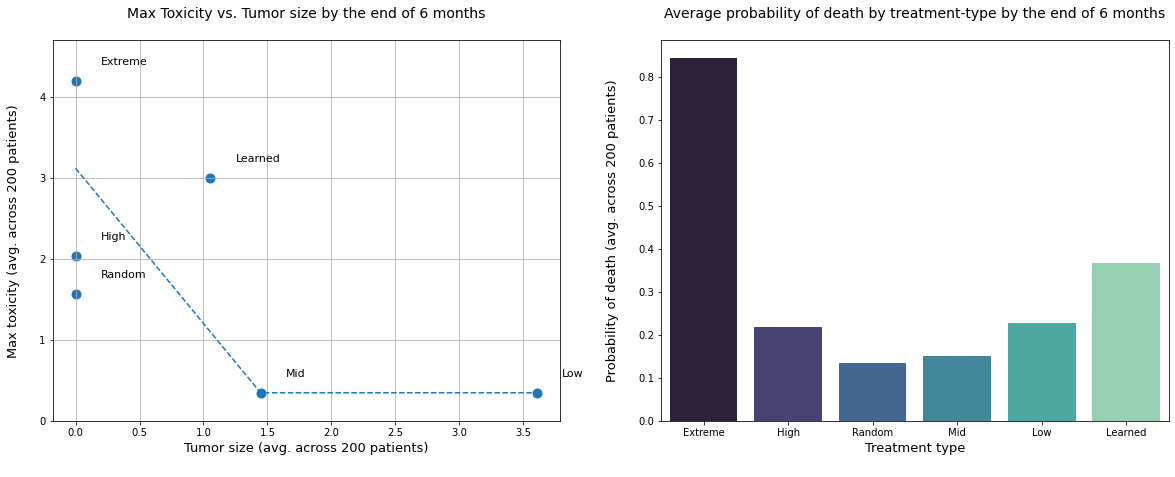

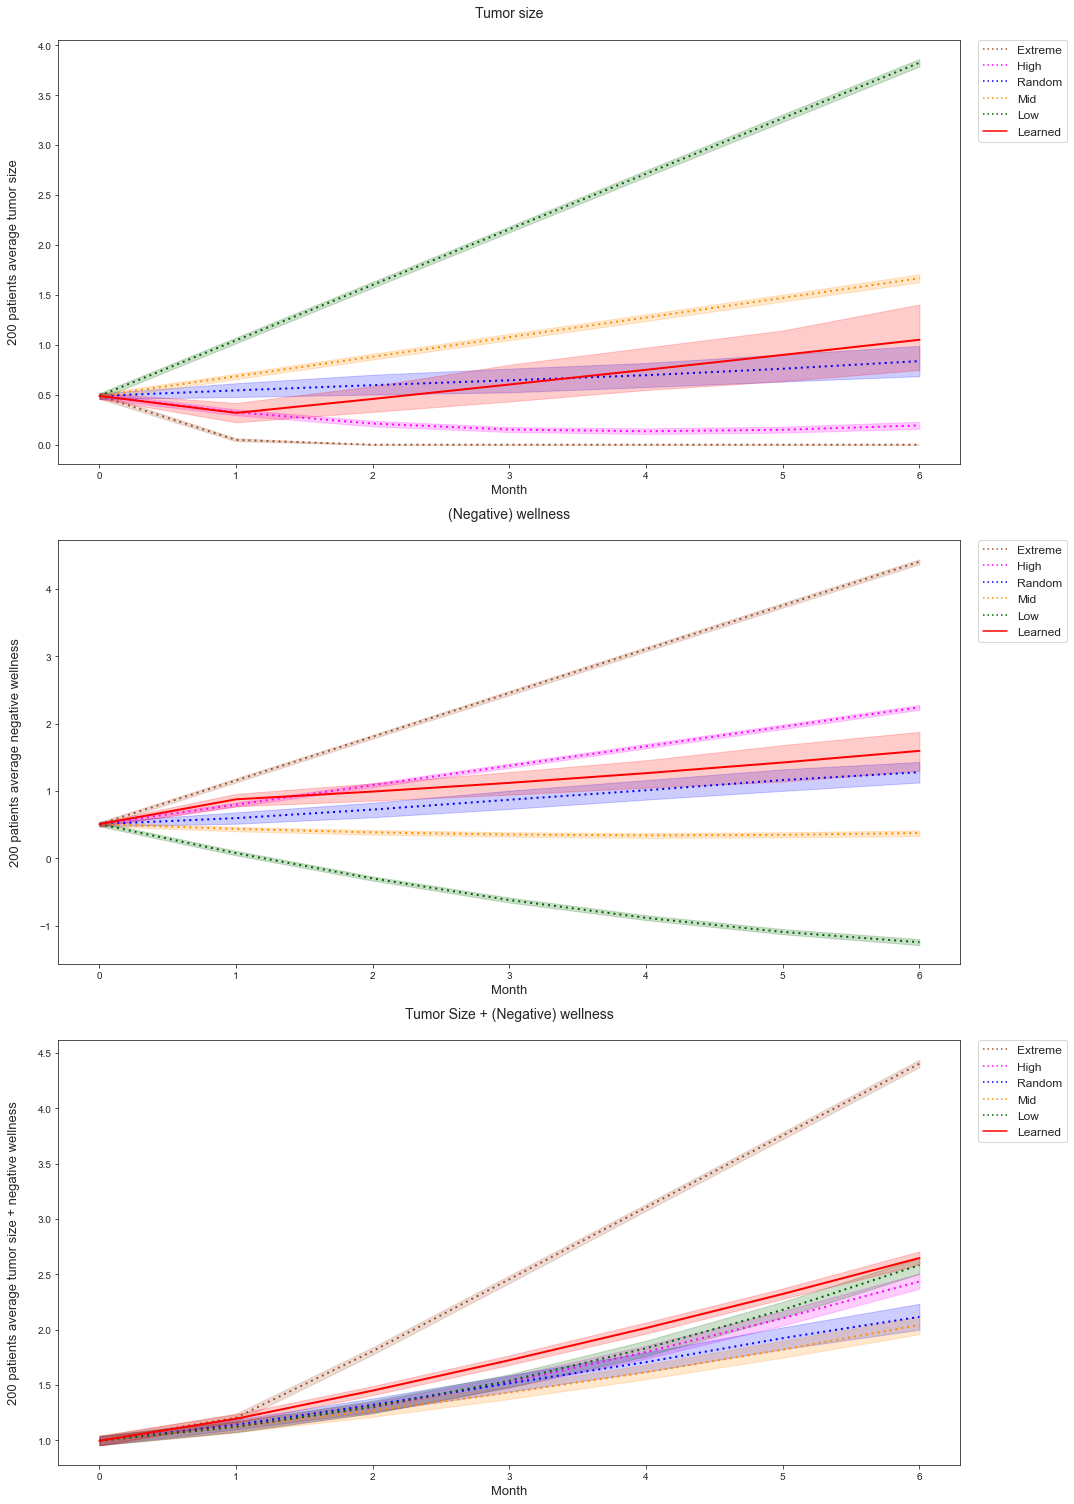


Policy Iteration: 1 - Evaluation results:
                         - Avg. ending tumor size : 1.050917397028753
                         - Avg. max. toxicity : 2.995929228044912
                         - Avg. tumor size + toxicity (at the end of 6 months): 1.7604659014730535
                         - Avg. prob. of death : 0.36625669173483094



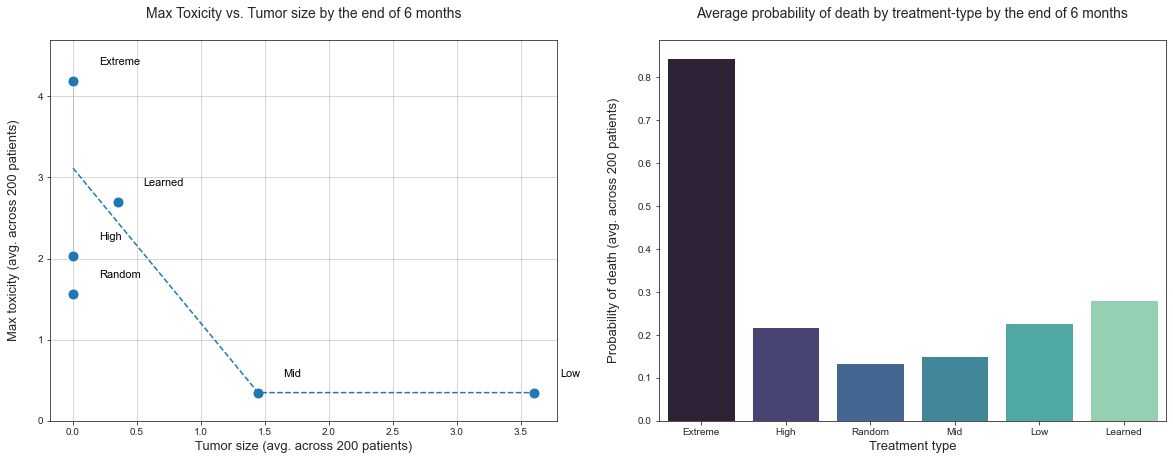

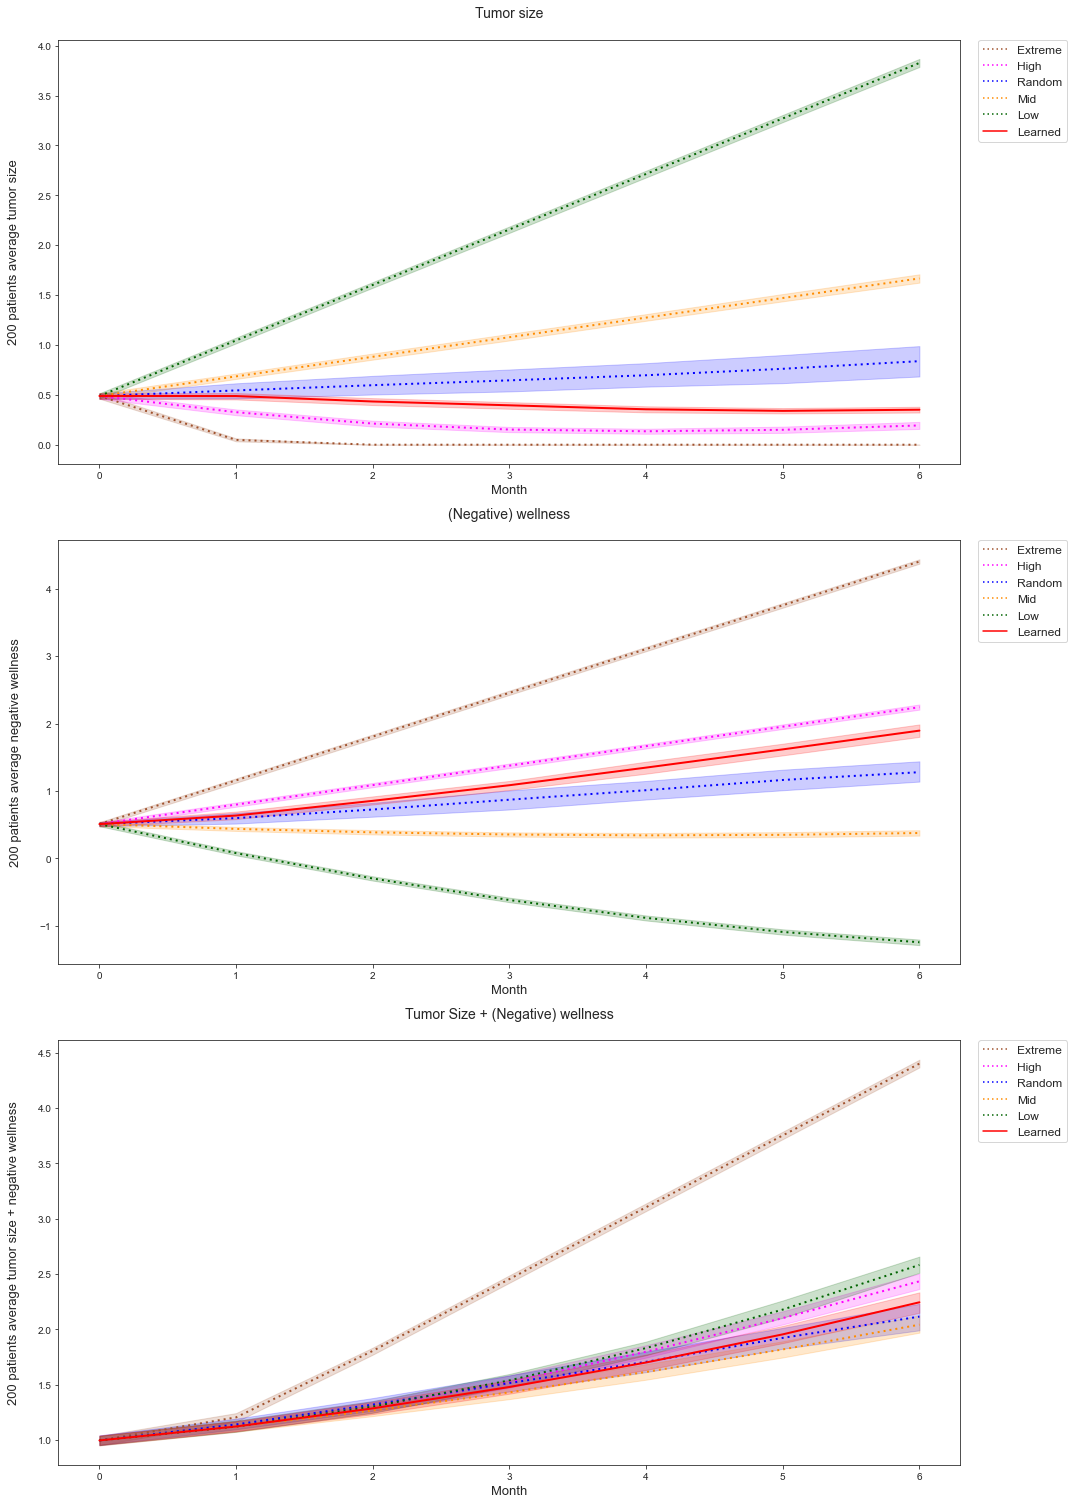


Policy Iteration: 2 - Evaluation results:
                         - Avg. ending tumor size : 0.35075014868392207
                         - Avg. max. toxicity : 2.7025090932771674
                         - Avg. tumor size + toxicity (at the end of 6 months): 1.7232940730634572
                         - Avg. prob. of death : 0.2796902755030607



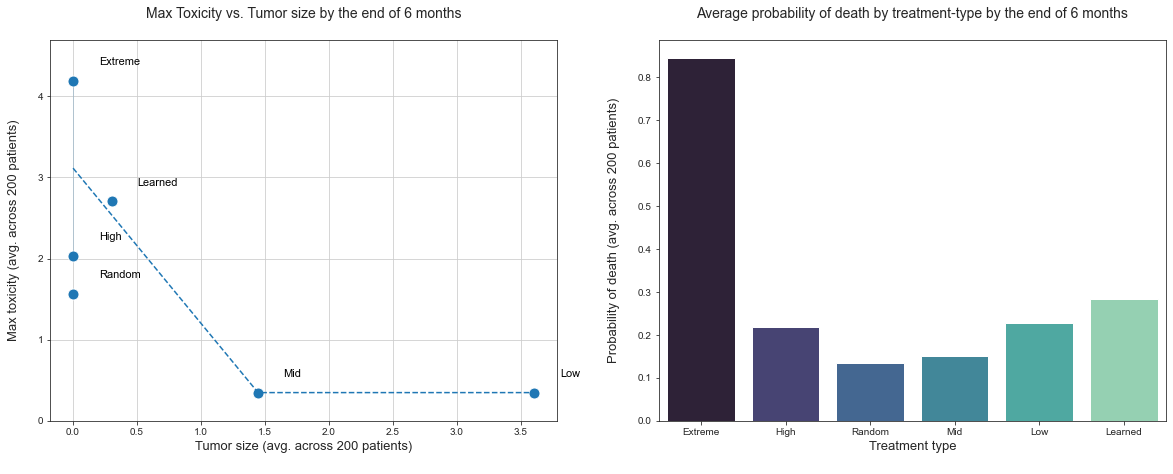

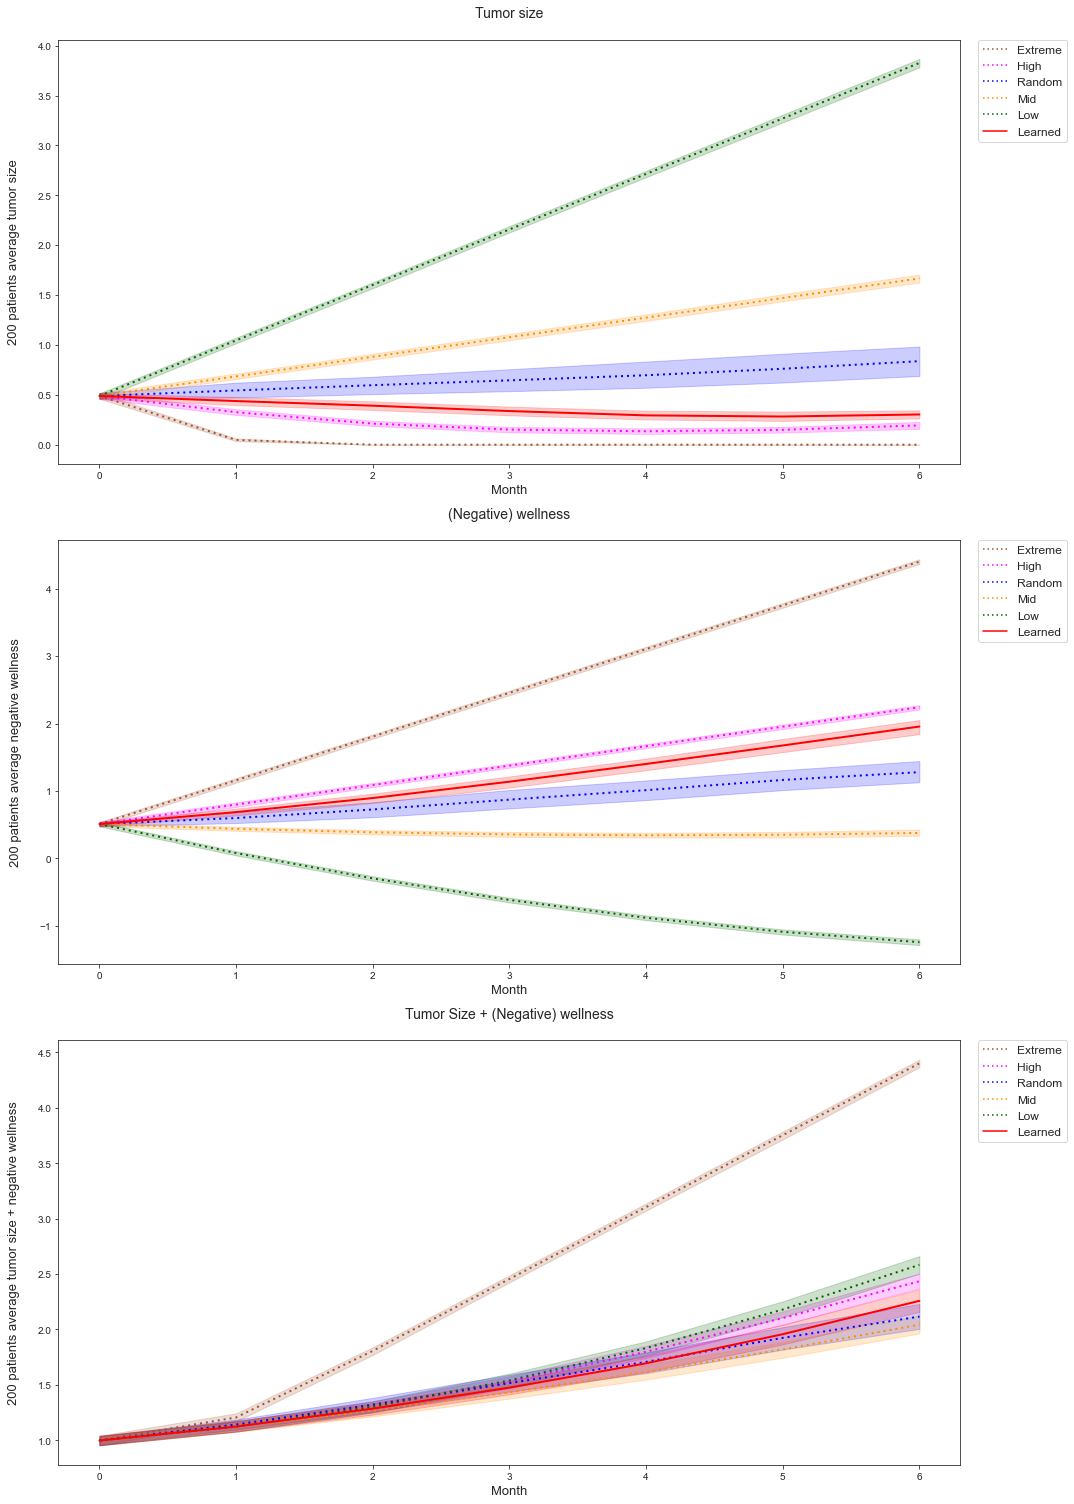


Policy Iteration: 3 - Evaluation results:
                         - Avg. ending tumor size : 0.3029680990554266
                         - Avg. max. toxicity : 2.7044377095893184
                         - Avg. tumor size + toxicity (at the end of 6 months): 1.723277760771767
                         - Avg. prob. of death : 0.2842381317644732



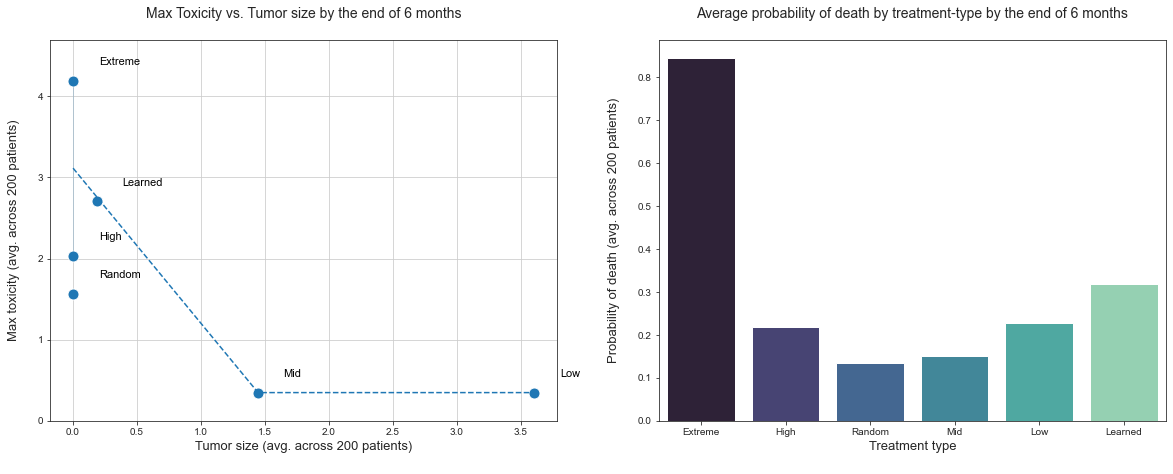

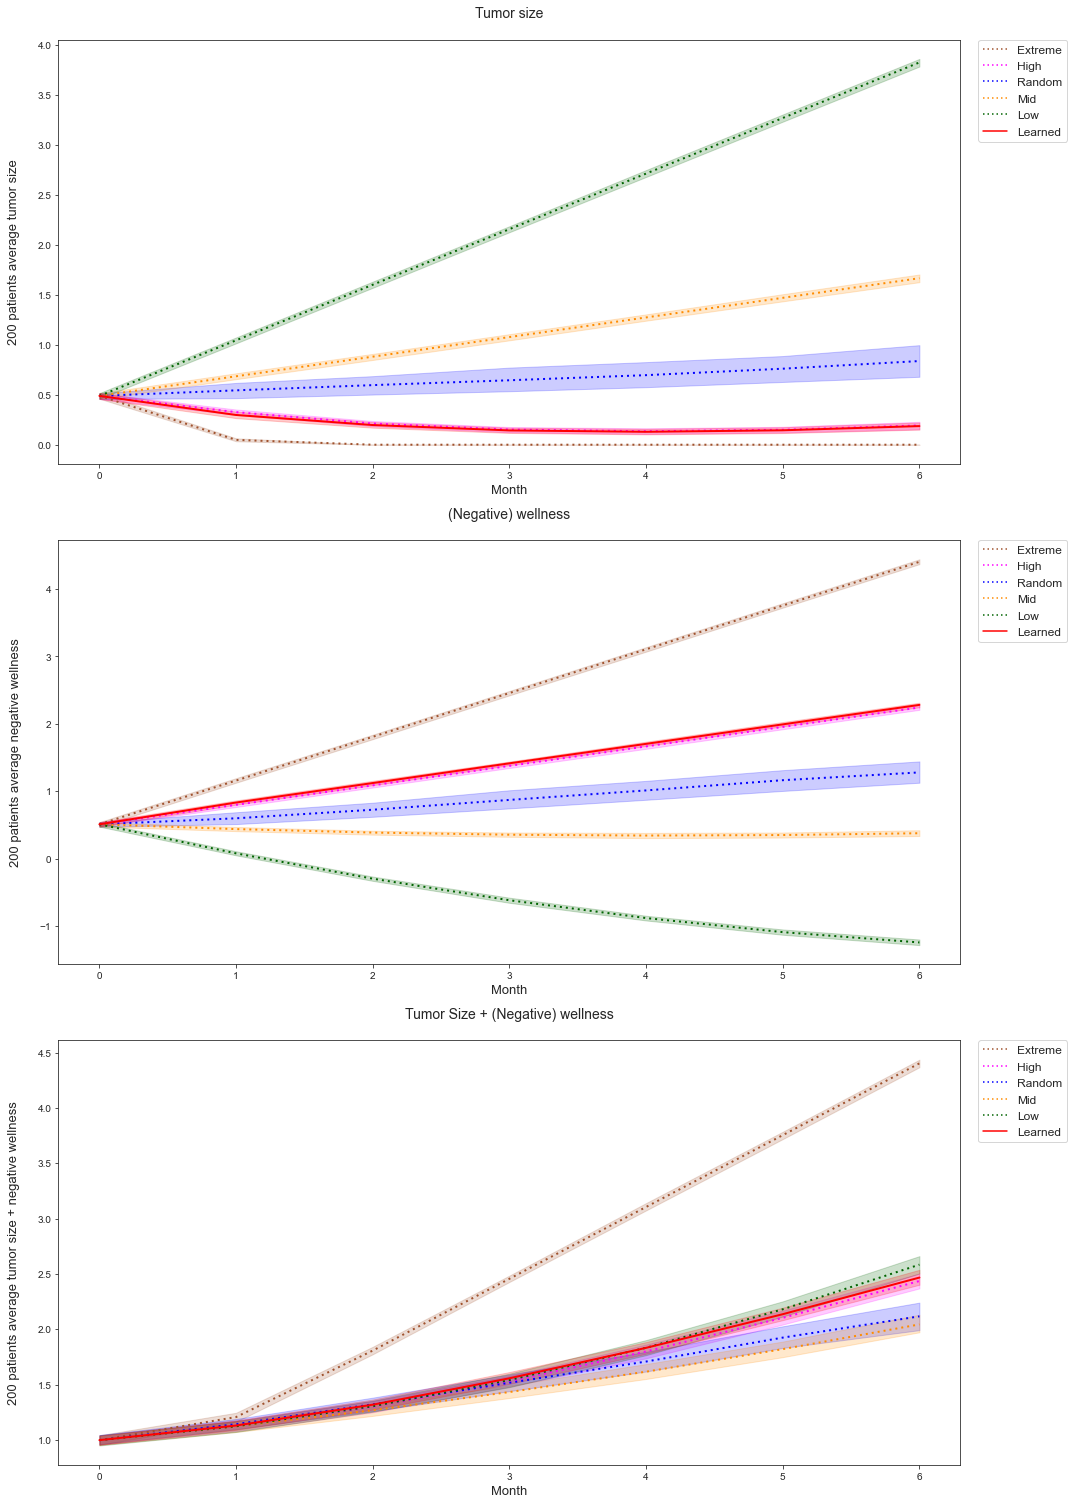


Policy Iteration: 4 - Evaluation results:
                         - Avg. ending tumor size : 0.18647616158745228
                         - Avg. max. toxicity : 2.7044377095893184
                         - Avg. tumor size + toxicity (at the end of 6 months): 1.7386056104486394
                         - Avg. prob. of death : 0.3189589320318508

Averege death rate increased by 10%! Policy performance decreased! Run-1 terminated!

Evaluations: 100%|██████████| 1/1 [1:24:28<00:00, 5068.64s/it]


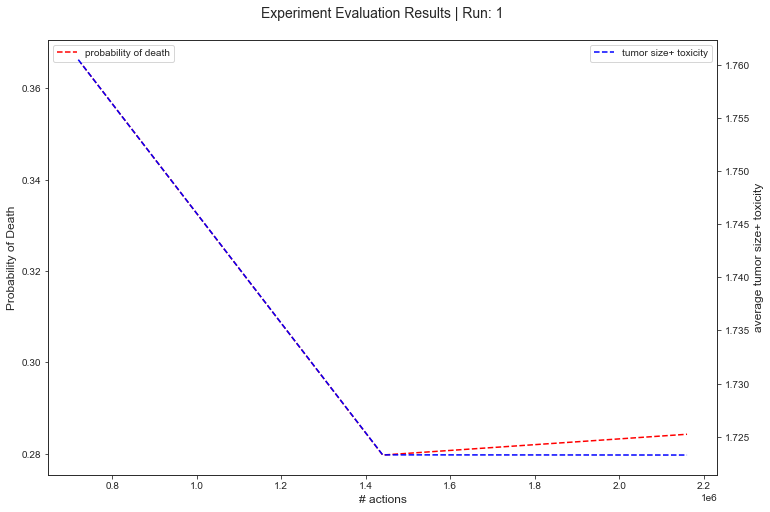

In [4]:
# Experiment execution
agg_results = []

eval_count = len(configs['S'])*len(configs['Actions'])*len(configs['Roll-outs'])*len(configs['Significance'])

pbar_evals = tqdm.tqdm(total=eval_count, desc="Evaluations")

for sample_size in configs['S']:
        
    for rollout_max in configs['Roll-outs']:

        for sig_lvl in configs['Significance']:

            run_results = evaluations_per_config(s_size                     = sample_size
                                                , init_state_group          = configs['init_state_group']

                                                , n_actions                 = configs['Actions'][0]
                                                , max_n_rollouts            = rollout_max
                                                , sig_lvl                   = sig_lvl

                                                , treatment_length_train    = 6
                                                , treatment_length_eval     = 6
                                                
                                                , max_policy_iter_per_run   = 10 # Maximum number of policy iterations per experiment
                                                , runs_per_config           = 1  # Number of experiments per one parameter config

                                                , eval_runs_per_state       = 1  # Episodes to generate from each init. state during evaluation phrase
                                                
                                                , off_policy_explr          = EXPLORE_LOGIC # What algorithm to use

                                                , rollout_tracking          = False # Show rollout info.
                                                , dataset_tracking          = False # Show train dataset

                                                , train_plot_tracking       = False # Show model training plot
                                                , eval_summary_tracking     = True  # Show a policy performance summary of evaluation runs
                                                , policy_behaviour_tracking = False # Show/store policy action selections vs. pendulum angle plot

                                                , show_experiment_run_eval_summary_plot = False # Show death-rate/tumor-size+toxicity vs. action no. plot of exp. run

                                                , use_toxi_n_tumor_for_pref = False # Generate preferences using sum(max-toxi, tumor-size) of rollouts
                                                , set_seed                  = 3
                                                , init_state_tag            = configs['init_state_tag']
                                                )

            agg_results.append(run_results)

            pbar_evals.update(1)
                
pbar_evals.close()

### Modified algorithm

In [5]:
############################################
################## INPUTS ##################

# Configs to test
N_STATES = 1000

configs = { 'CONFIG_NO': 2
          , 'S': [N_STATES]
          , 'Actions' : [6]
          , 'Roll-outs': [10]
          , 'Significance' : [0.1]
          , 'init_state_group': 'group_1'
          , 'init_state_tag': 'g1'
          }

algorithm = ALGO_TYPE['modified']

############################################
############################################

# Algorithm configs
ALGO_NAME = algorithm['name']
EXPLORE_LOGIC = algorithm['exploration']

Runs:   0%|          | 0/1 [00:00<?, ?it/s]
State generation seed is 3


Currently evaluated configs:
 Samples: 1000 | Actions: 6 | Roll-outs: 10 | Significance: 0.1


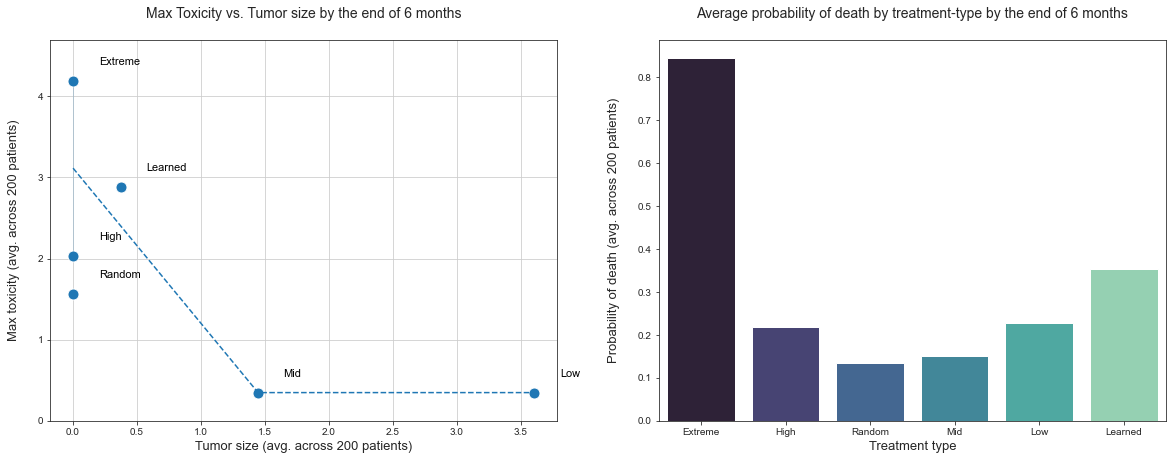

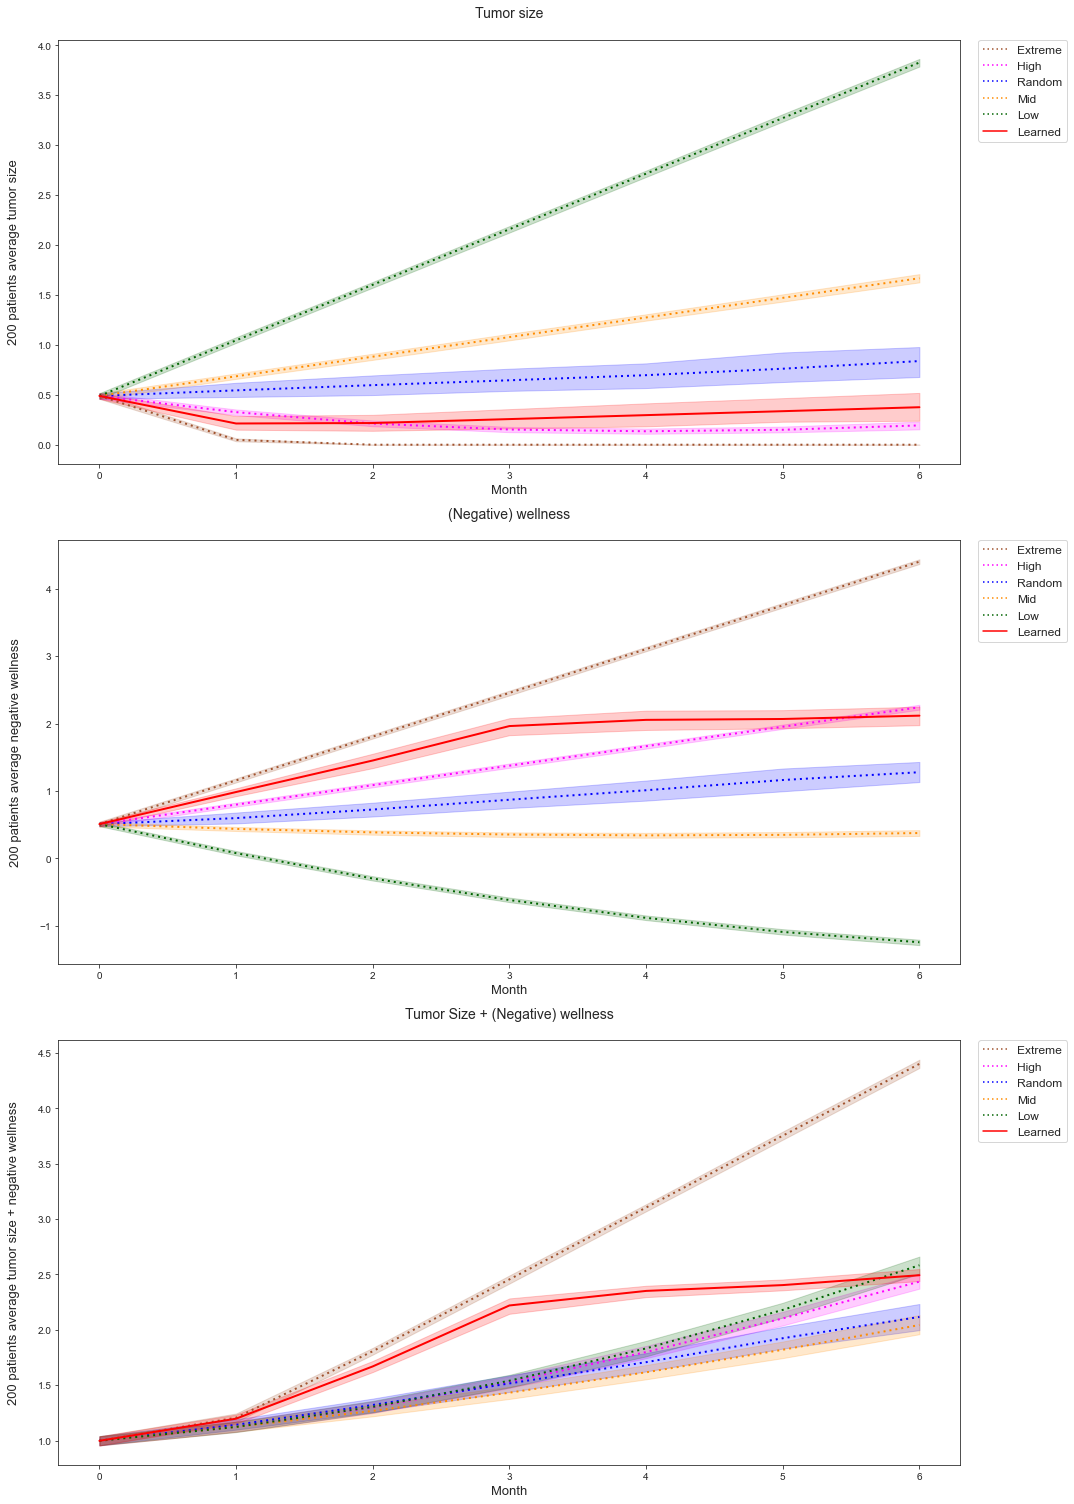


Policy Iteration: 1 - Evaluation results:
                         - Avg. ending tumor size : 0.3753509026255691
                         - Avg. max. toxicity : 2.8778431478484237
                         - Avg. tumor size + toxicity (at the end of 6 months): 1.7837930773641308
                         - Avg. prob. of death : 0.35267491220976177



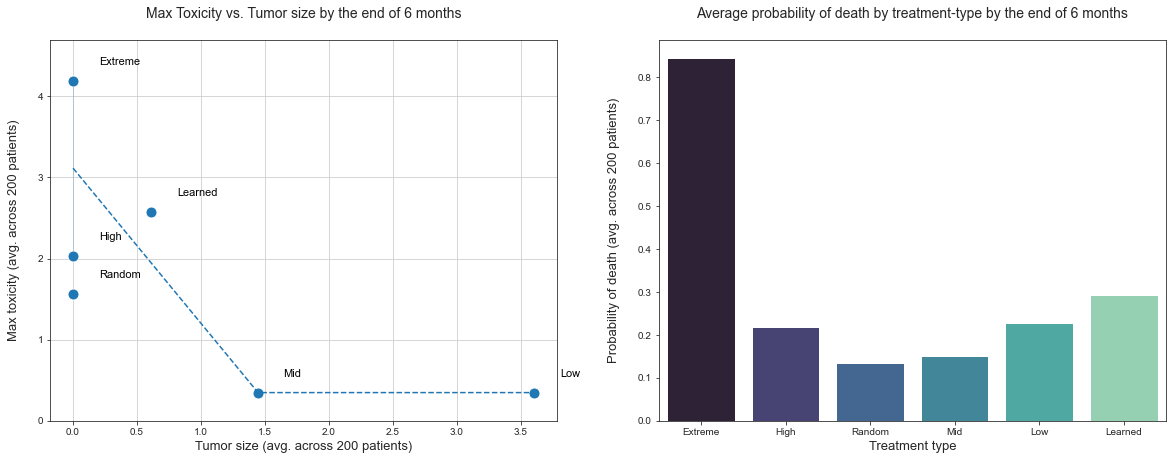

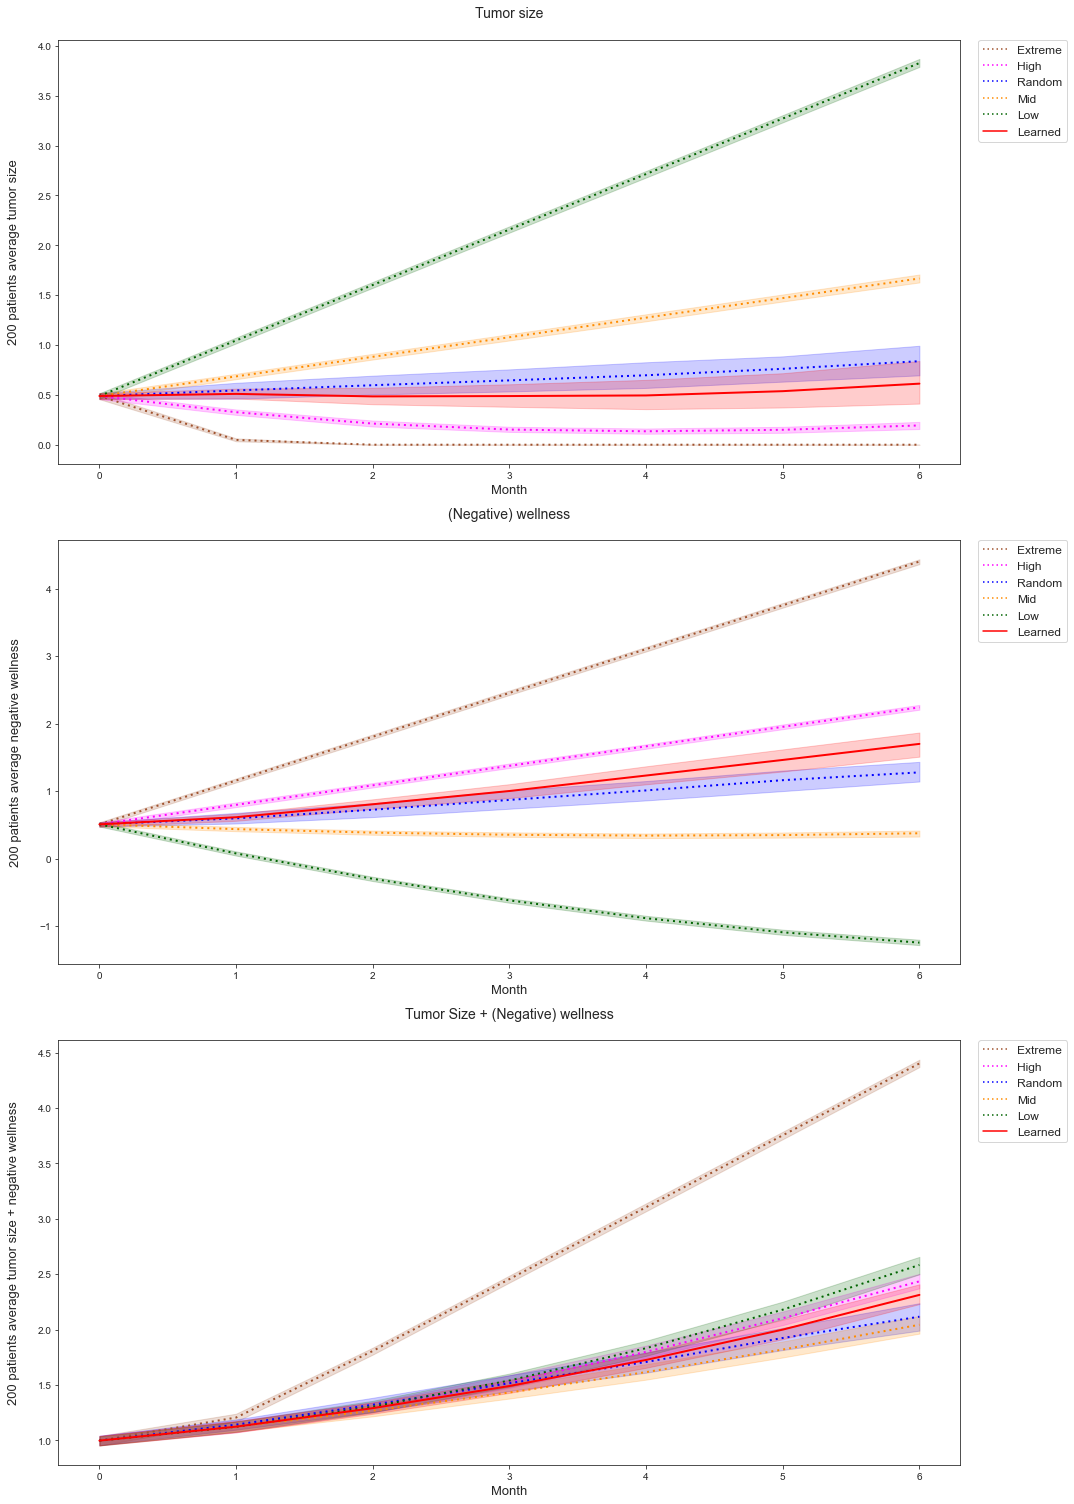


Policy Iteration: 2 - Evaluation results:
                         - Avg. ending tumor size : 0.6121695807613821
                         - Avg. max. toxicity : 2.5744348089452895
                         - Avg. tumor size + toxicity (at the end of 6 months): 1.7268391550318678
                         - Avg. prob. of death : 0.292860036072333



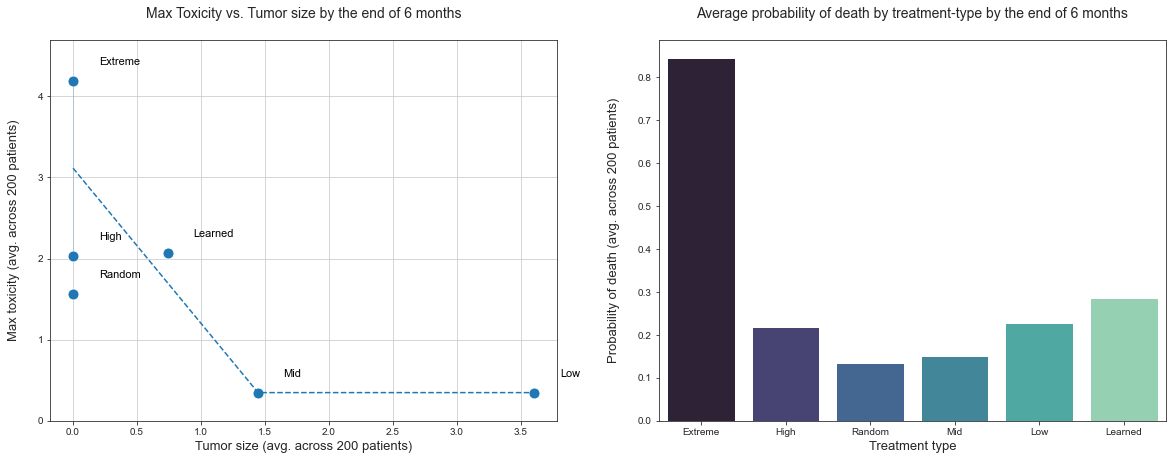

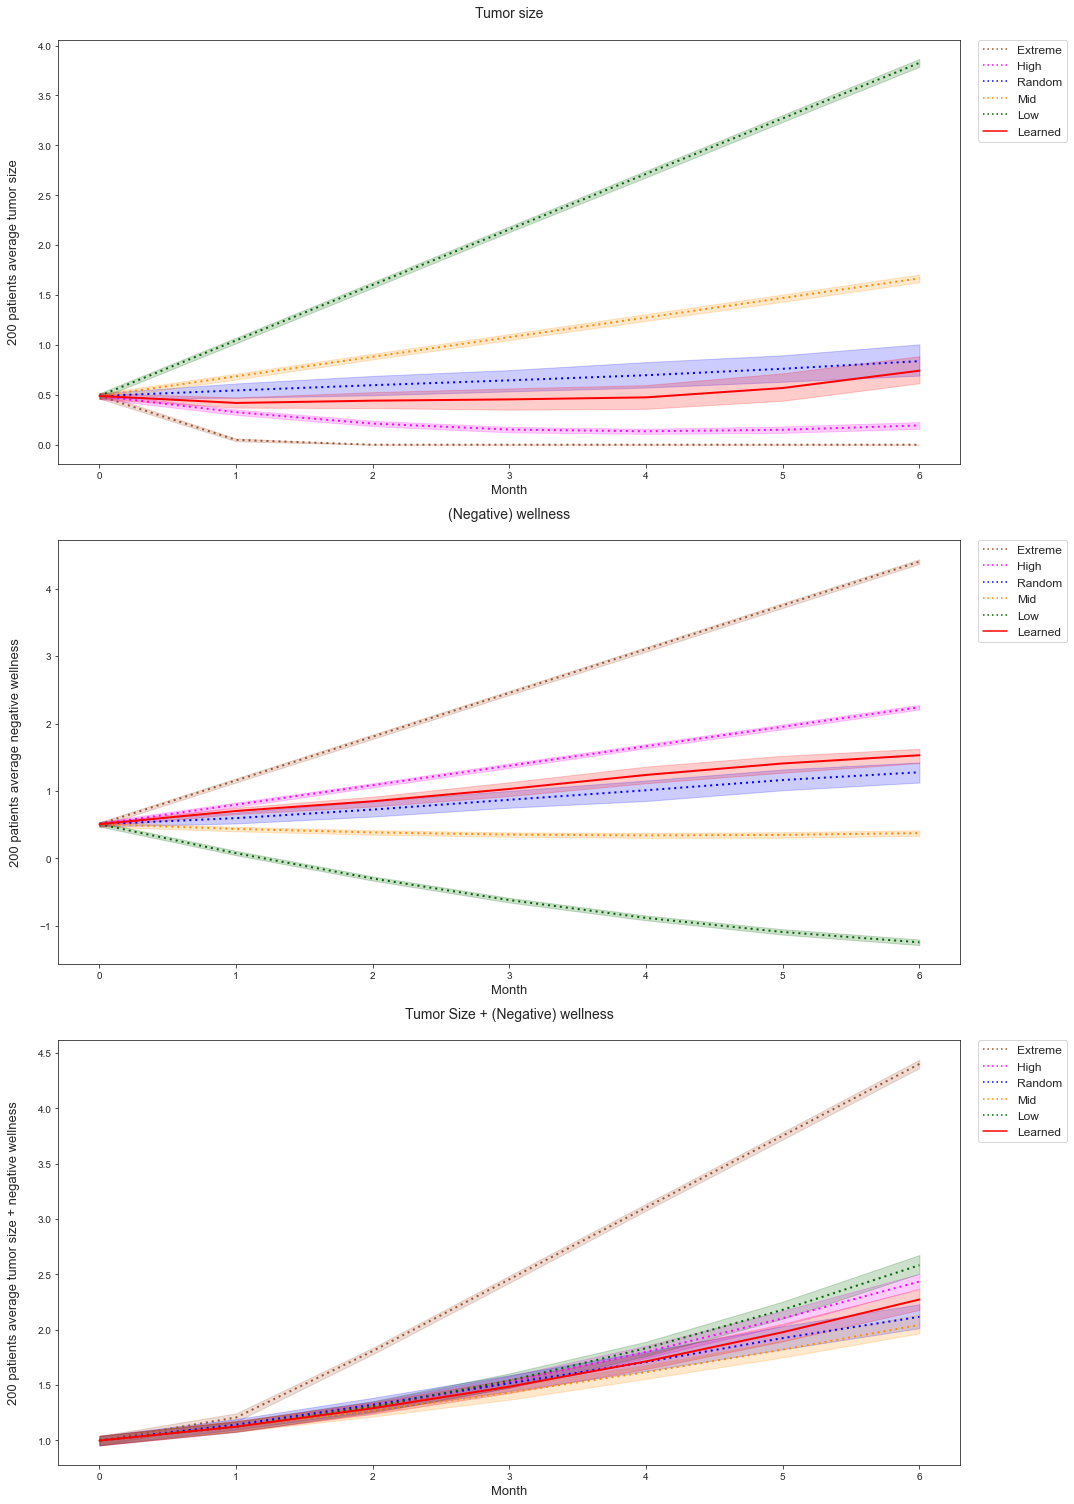


Policy Iteration: 3 - Evaluation results:
                         - Avg. ending tumor size : 0.741703311430216
                         - Avg. max. toxicity : 2.066213443337809
                         - Avg. tumor size + toxicity (at the end of 6 months): 1.7248718011671897
                         - Avg. prob. of death : 0.2849848278177778



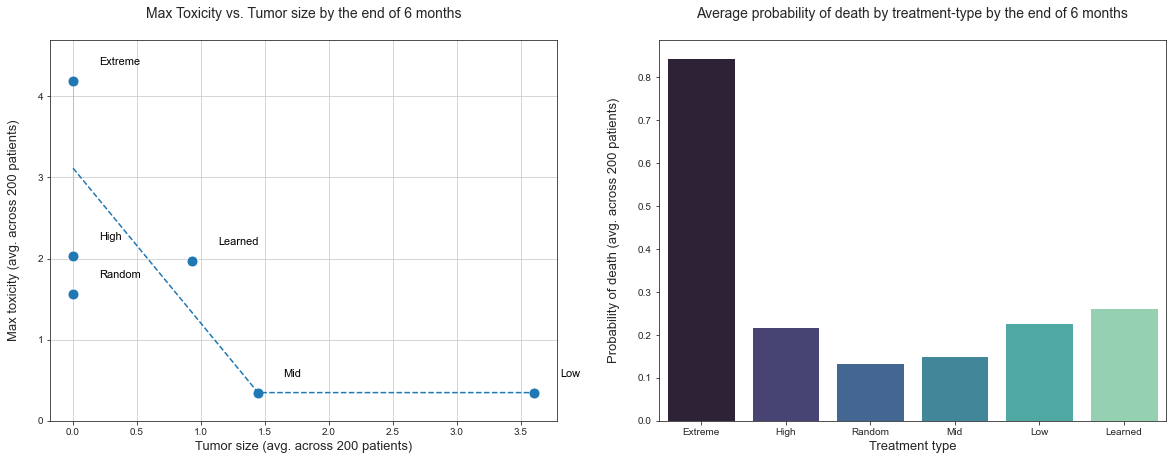

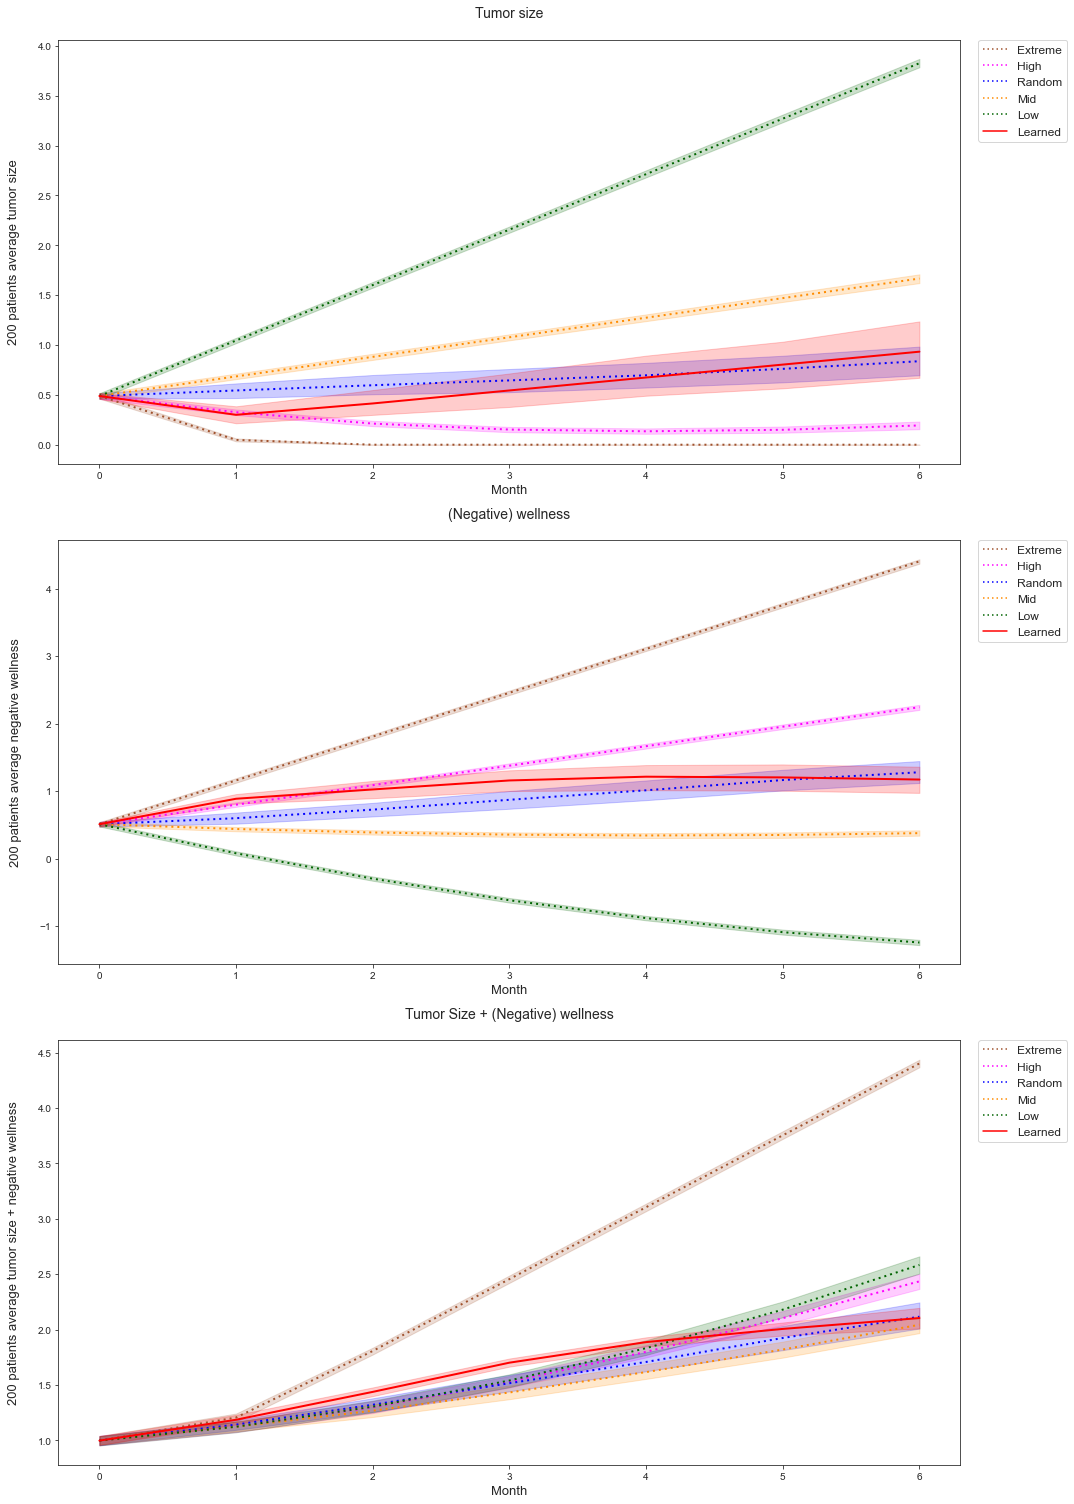


Policy Iteration: 4 - Evaluation results:
                         - Avg. ending tumor size : 0.9331682868634686
                         - Avg. max. toxicity : 1.9720311948414178
                         - Avg. tumor size + toxicity (at the end of 6 months): 1.735828938757237
                         - Avg. prob. of death : 0.2631782999380042



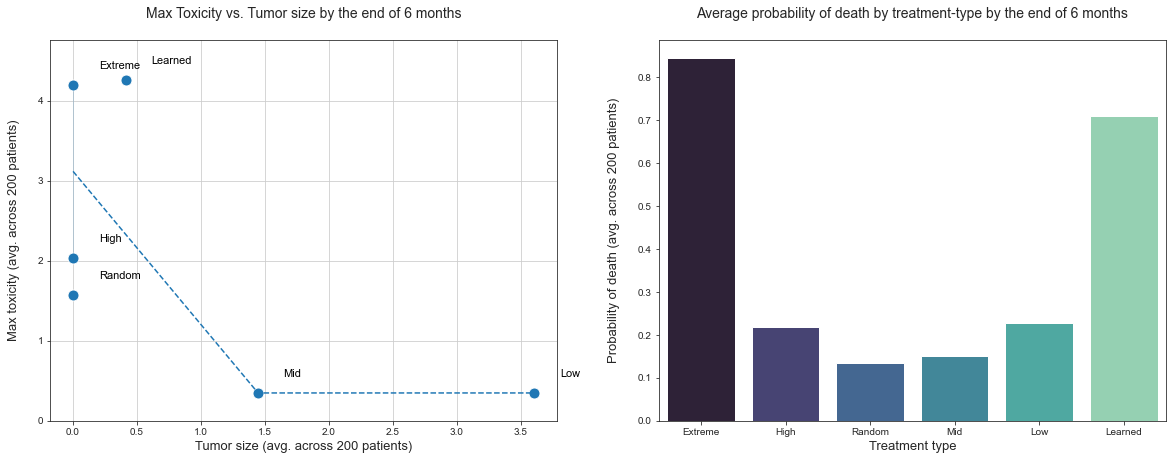

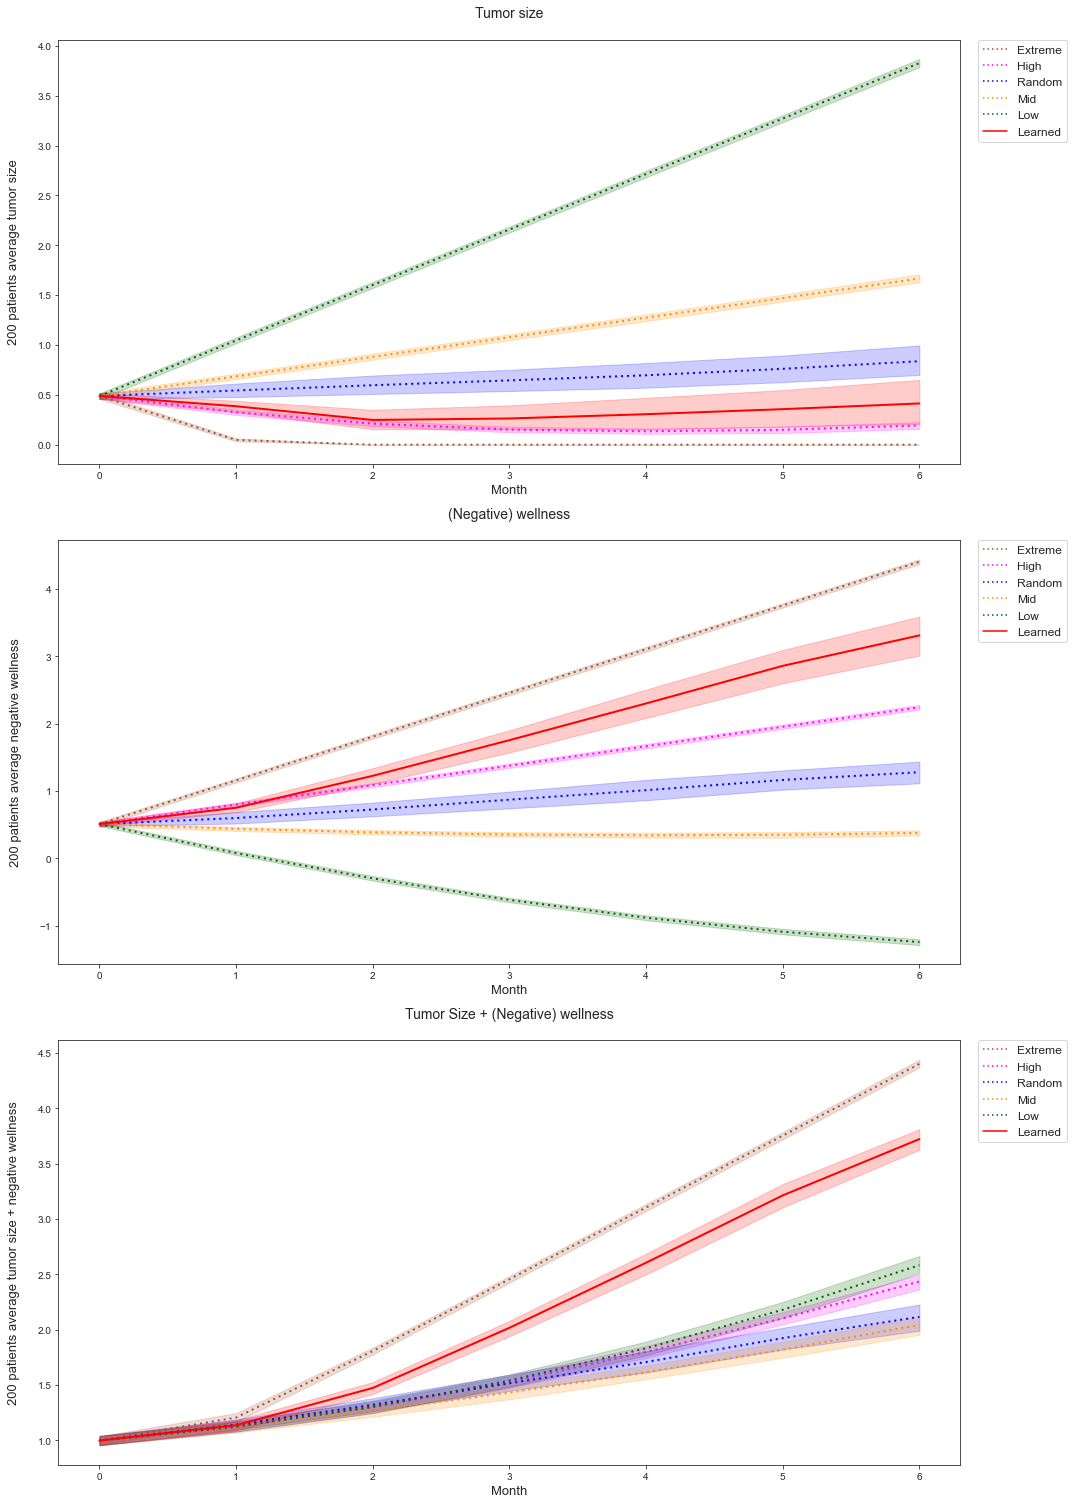


Policy Iteration: 5 - Evaluation results:
                         - Avg. ending tumor size : 0.4135847473095852
                         - Avg. max. toxicity : 4.255415377814521
                         - Avg. tumor size + toxicity (at the end of 6 months): 1.827433098777318
                         - Avg. prob. of death : 0.7088415377802464

Averege death rate increased by 10%! Policy performance decreased! Run-1 terminated!

Evaluations: 100%|██████████| 1/1 [1:19:35<00:00, 4775.65s/it]


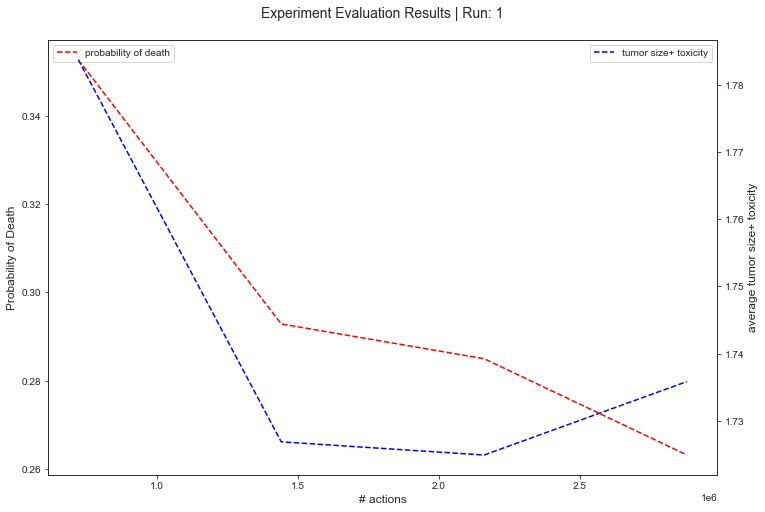

In [6]:
# Experiment execution
agg_results = []

eval_count = len(configs['S'])*len(configs['Actions'])*len(configs['Roll-outs'])*len(configs['Significance'])

pbar_evals = tqdm.tqdm(total=eval_count, desc="Evaluations")

for sample_size in configs['S']:
        
    for rollout_max in configs['Roll-outs']:

        for sig_lvl in configs['Significance']:

            run_results = evaluations_per_config(s_size                     = sample_size
                                                , init_state_group          = configs['init_state_group']  
                                                , n_actions                 = configs['Actions'][0]
                                                , max_n_rollouts            = rollout_max
                                                , sig_lvl                   = sig_lvl

                                                , treatment_length_train    = 6
                                                , treatment_length_eval     = 6
                                                
                                                , max_policy_iter_per_run   = 10 # Maximum number of policy iterations per experiment
                                                , runs_per_config           = 1  # Number of experiments per one parameter config

                                                , eval_runs_per_state       = 1  # Episodes to generate from each init. state during evaluation phrase
                                                
                                                , off_policy_explr          = EXPLORE_LOGIC # What algorithm to use

                                                , rollout_tracking          = False # Show rollout info.
                                                , dataset_tracking          = False # Show train dataset

                                                , train_plot_tracking       = False # Show model training plot
                                                , eval_summary_tracking     = True  # Show a policy performance summary of evaluation runs
                                                , policy_behaviour_tracking = False # Show/store policy action selections vs. pendulum angle plot

                                                , show_experiment_run_eval_summary_plot = False # Show death-rate/tumor-size+toxicity vs. action no. plot of exp. run

                                                , use_toxi_n_tumor_for_pref = False # Generate preferences using sum(max-toxi, tumor-size) of rollouts
                                                , set_seed                  = 3
                                                , init_state_tag            = configs['init_state_tag']
                                                )

            agg_results.append(run_results)

            pbar_evals.update(1)
                
pbar_evals.close()

---
## Using `tumor size + toxicity` to generate preferences

### Original algorithm

In [7]:
############################################
################## INPUTS ##################

# Configs to test
N_STATES = 1000

configs = { 'CONFIG_NO': 3
          , 'S': [N_STATES]
          , 'Actions' : [6]
          , 'Roll-outs': [10]
          , 'Significance' : [0.1]
          , 'init_state_group': 'group_1'
          , 'init_state_tag': 'g1'
          }

algorithm = ALGO_TYPE['original']

############################################
############################################

# Algorithm configs
ALGO_NAME = algorithm['name']
EXPLORE_LOGIC = algorithm['exploration']

Runs:   0%|          | 0/1 [00:00<?, ?it/s]
State generation seed is 3


Currently evaluated configs:
 Samples: 1000 | Actions: 6 | Roll-outs: 10 | Significance: 0.1


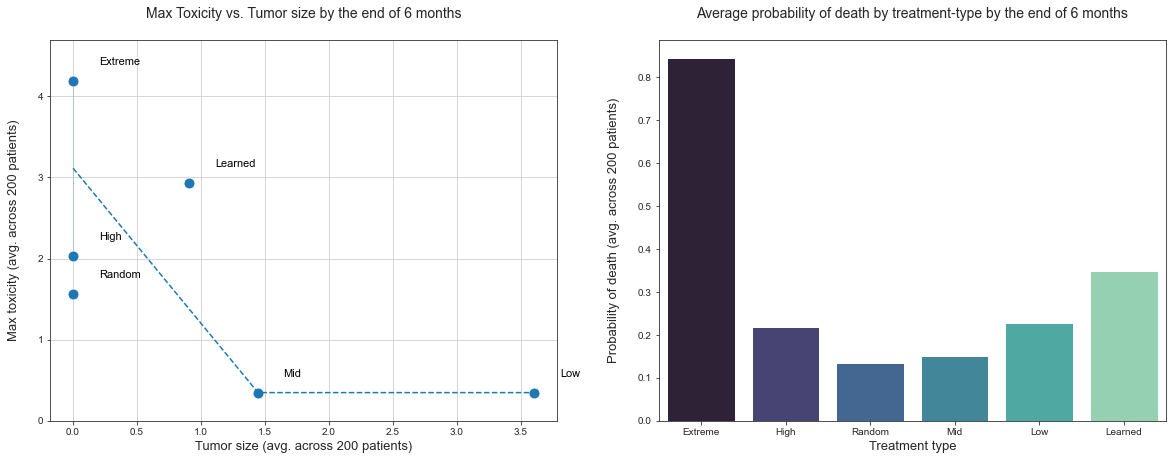

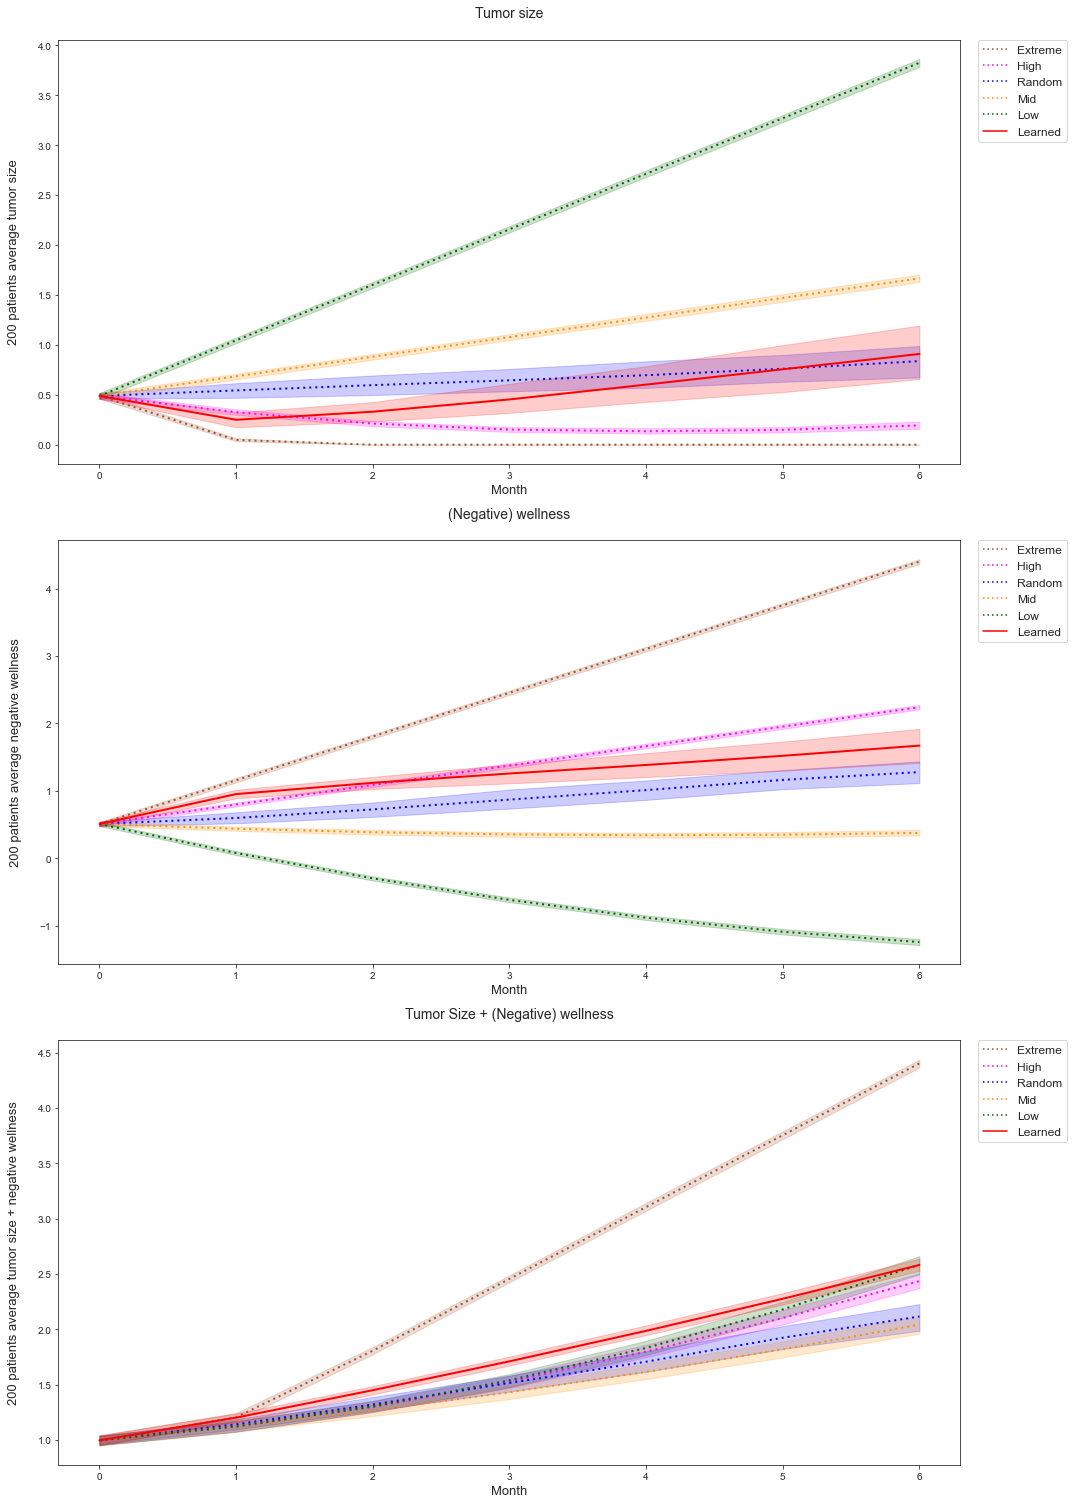


Policy Iteration: 1 - Evaluation results:
                         - Avg. ending tumor size : 0.9092564935306031
                         - Avg. max. toxicity : 2.9299972845890845
                         - Avg. tumor size + toxicity (at the end of 6 months): 1.7569417586300315
                         - Avg. prob. of death : 0.3491000664462918



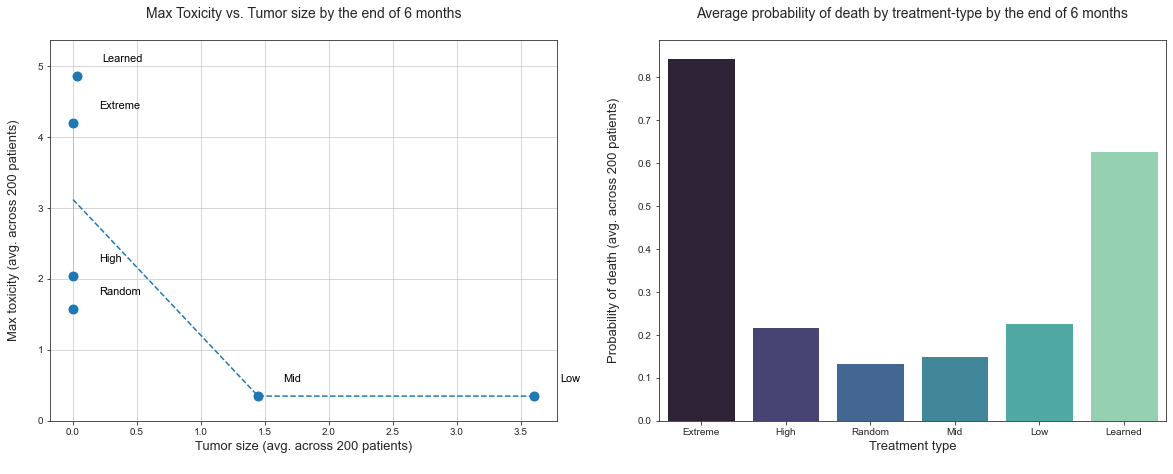

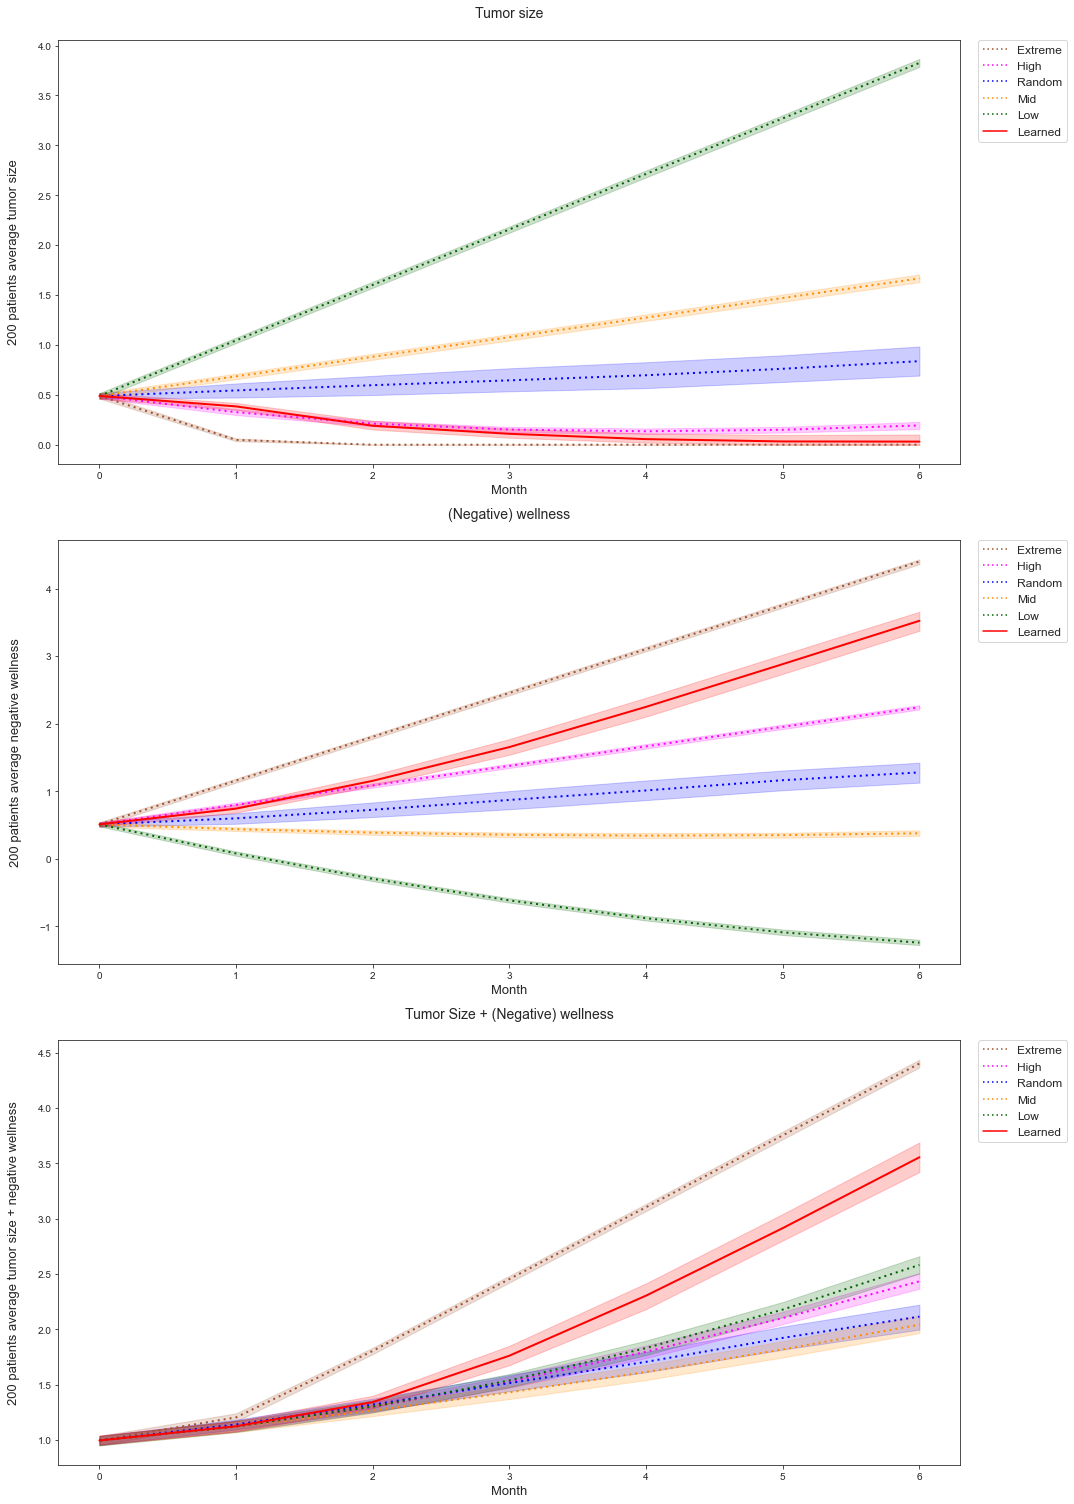


Policy Iteration: 2 - Evaluation results:
                         - Avg. ending tumor size : 0.031128592787960815
                         - Avg. max. toxicity : 4.861796009708448
                         - Avg. tumor size + toxicity (at the end of 6 months): 1.7998598717629606
                         - Avg. prob. of death : 0.626678852242241

Averege death rate increased by 10%! Policy performance decreased! Run-1 terminated!

Evaluations: 100%|██████████| 1/1 [39:17<00:00, 2357.32s/it]


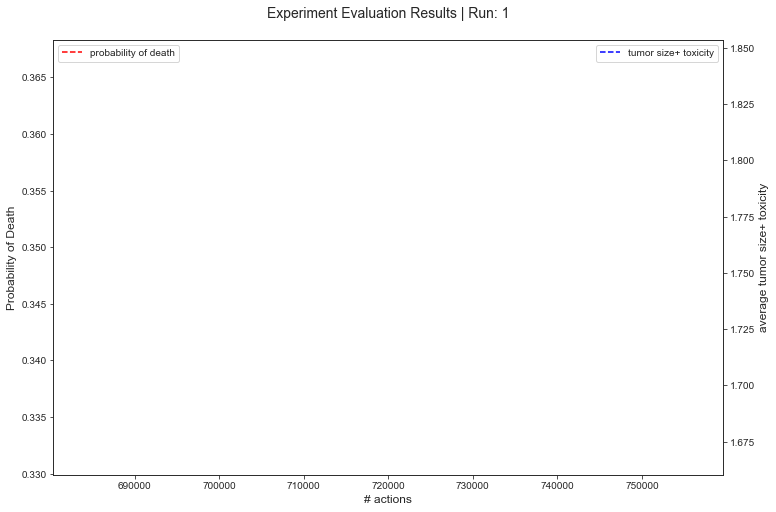

In [8]:
# Experiment execution
agg_results = []

eval_count = len(configs['S'])*len(configs['Actions'])*len(configs['Roll-outs'])*len(configs['Significance'])

pbar_evals = tqdm.tqdm(total=eval_count, desc="Evaluations")

for sample_size in configs['S']:
        
    for rollout_max in configs['Roll-outs']:

        for sig_lvl in configs['Significance']:

            run_results = evaluations_per_config(s_size                     = sample_size
                                                , init_state_group          = configs['init_state_group']

                                                , n_actions                 = configs['Actions'][0]
                                                , max_n_rollouts            = rollout_max
                                                , sig_lvl                   = sig_lvl

                                                , treatment_length_train    = 6
                                                , treatment_length_eval     = 6
                                                
                                                , max_policy_iter_per_run   = 10 # Maximum number of policy iterations per experiment
                                                , runs_per_config           = 1  # Number of experiments per one parameter config

                                                , eval_runs_per_state       = 1  # Episodes to generate from each init. state during evaluation phrase
                                                
                                                , off_policy_explr          = EXPLORE_LOGIC # What algorithm to use

                                                , rollout_tracking          = False # Show rollout info.
                                                , dataset_tracking          = False # Show train dataset

                                                , train_plot_tracking       = False # Show model training plot
                                                , eval_summary_tracking     = True  # Show a policy performance summary of evaluation runs
                                                , policy_behaviour_tracking = False # Show/store policy action selections vs. pendulum angle plot

                                                , show_experiment_run_eval_summary_plot = False # Show death-rate/tumor-size+toxicity vs. action no. plot of exp. run

                                                , use_toxi_n_tumor_for_pref = True # Generate preferences using sum(max-toxi, tumor-size) of rollouts
                                                , set_seed                  = 3
                                                , init_state_tag            = configs['init_state_tag']
                                                )

            agg_results.append(run_results)

            pbar_evals.update(1)
                
pbar_evals.close()

### Modified algorithm

In [9]:
############################################
################## INPUTS ##################

# Configs to test
N_STATES = 1000

configs = { 'CONFIG_NO': 4
          , 'S': [N_STATES]
          , 'Actions' : [6]
          , 'Roll-outs': [10]
          , 'Significance' : [0.1]
          , 'init_state_group': 'group_1'
          , 'init_state_tag': 'g1'
          }

algorithm = ALGO_TYPE['modified']

############################################
############################################

# Algorithm configs
ALGO_NAME = algorithm['name']
EXPLORE_LOGIC = algorithm['exploration']

Runs:   0%|          | 0/1 [00:00<?, ?it/s]
State generation seed is 3


Currently evaluated configs:
 Samples: 1000 | Actions: 6 | Roll-outs: 10 | Significance: 0.1


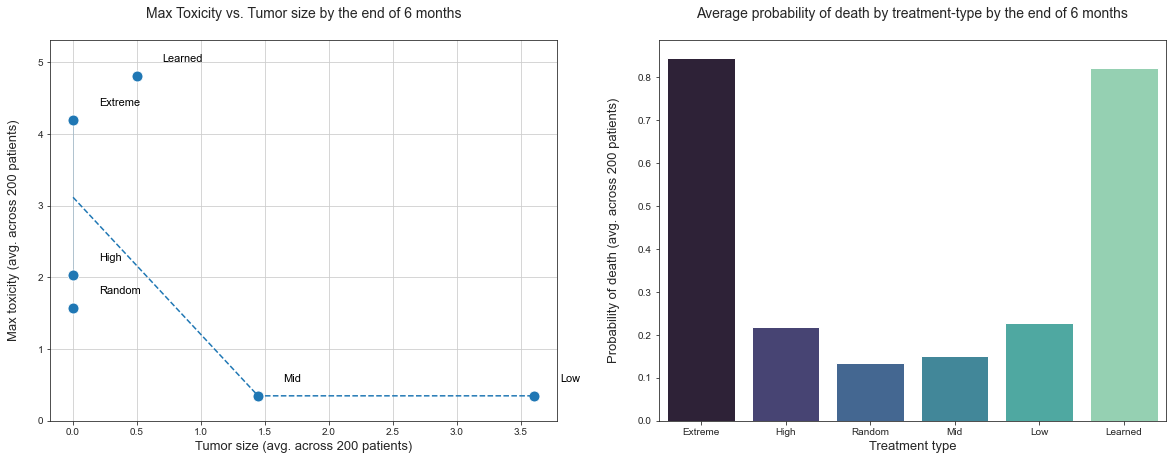

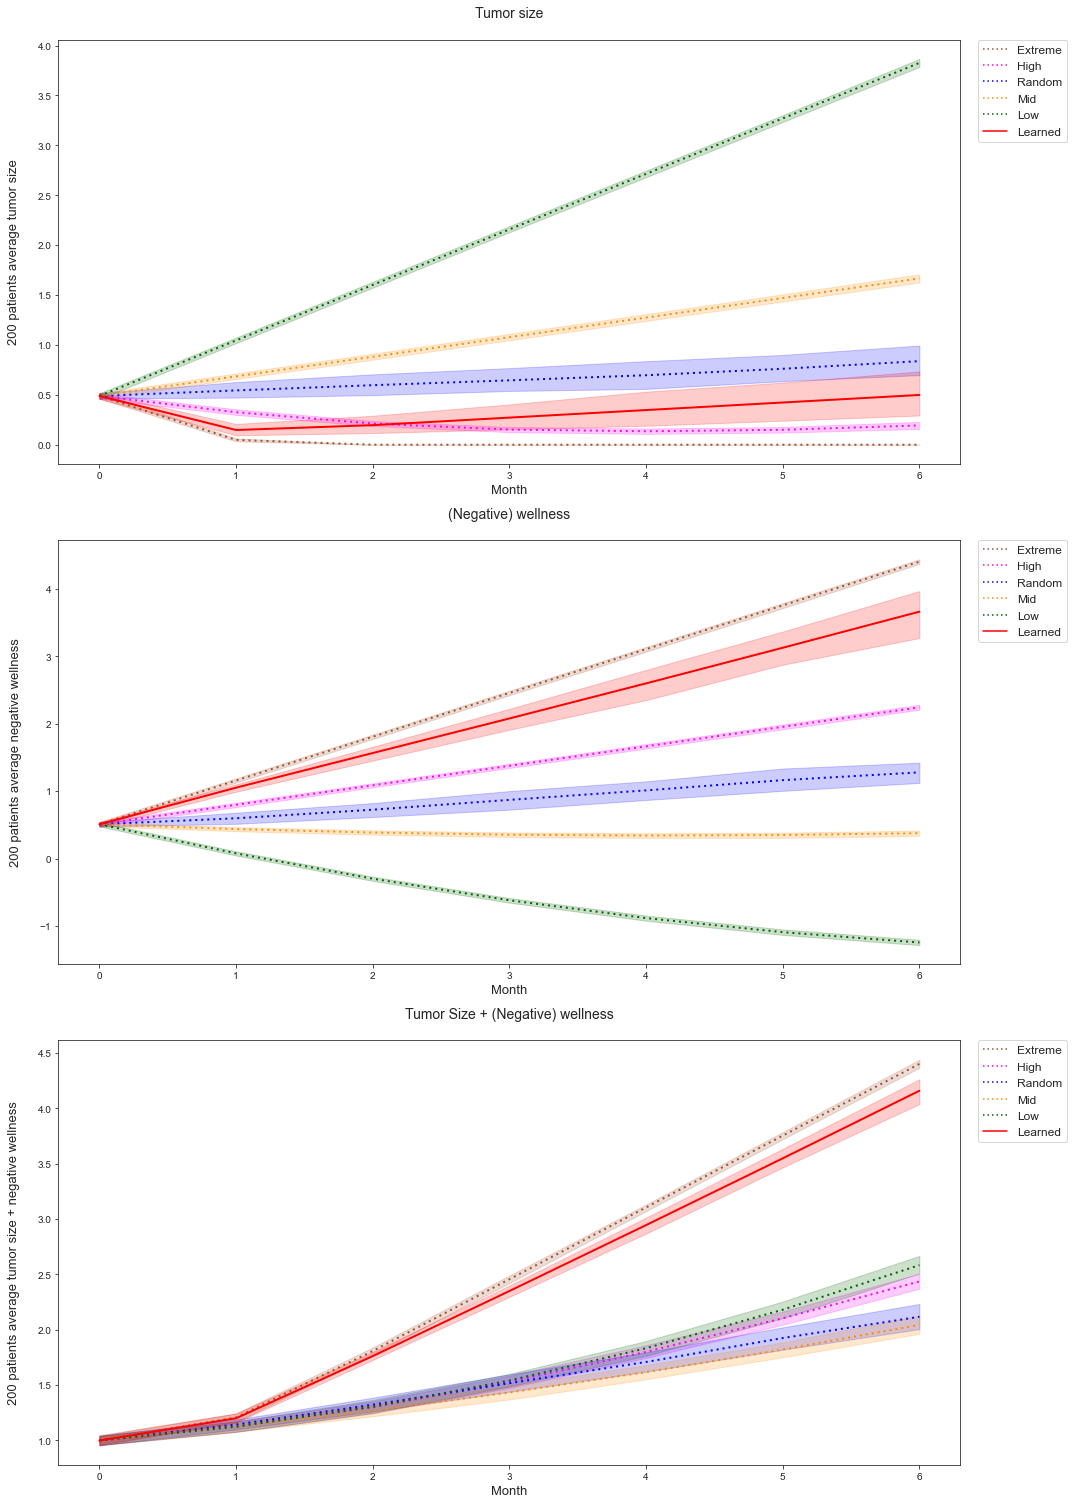


Policy Iteration: 1 - Evaluation results:
                         - Avg. ending tumor size : 0.49845837289542105
                         - Avg. max. toxicity : 4.807603218471064
                         - Avg. tumor size + toxicity (at the end of 6 months): 1.8700974007826543
                         - Avg. prob. of death : 0.8203756989328201



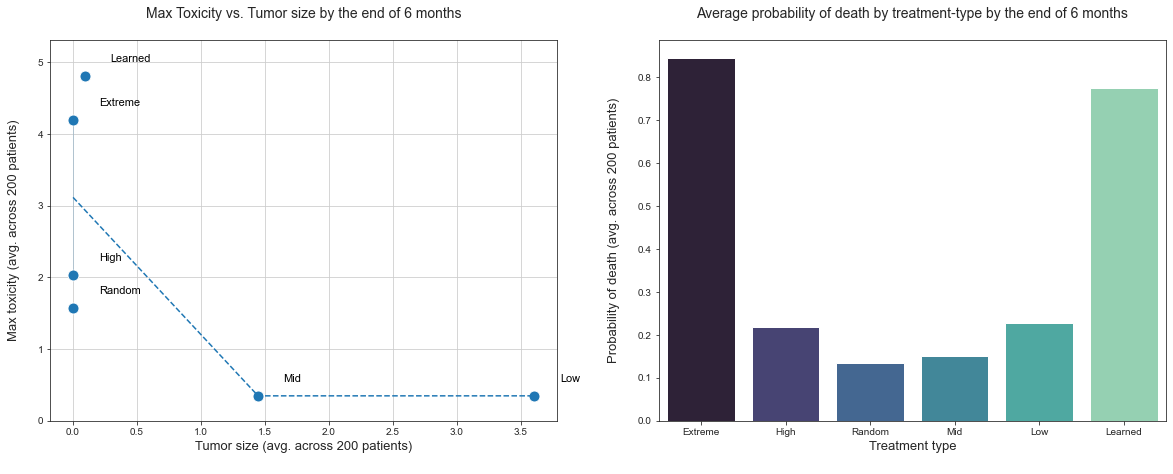

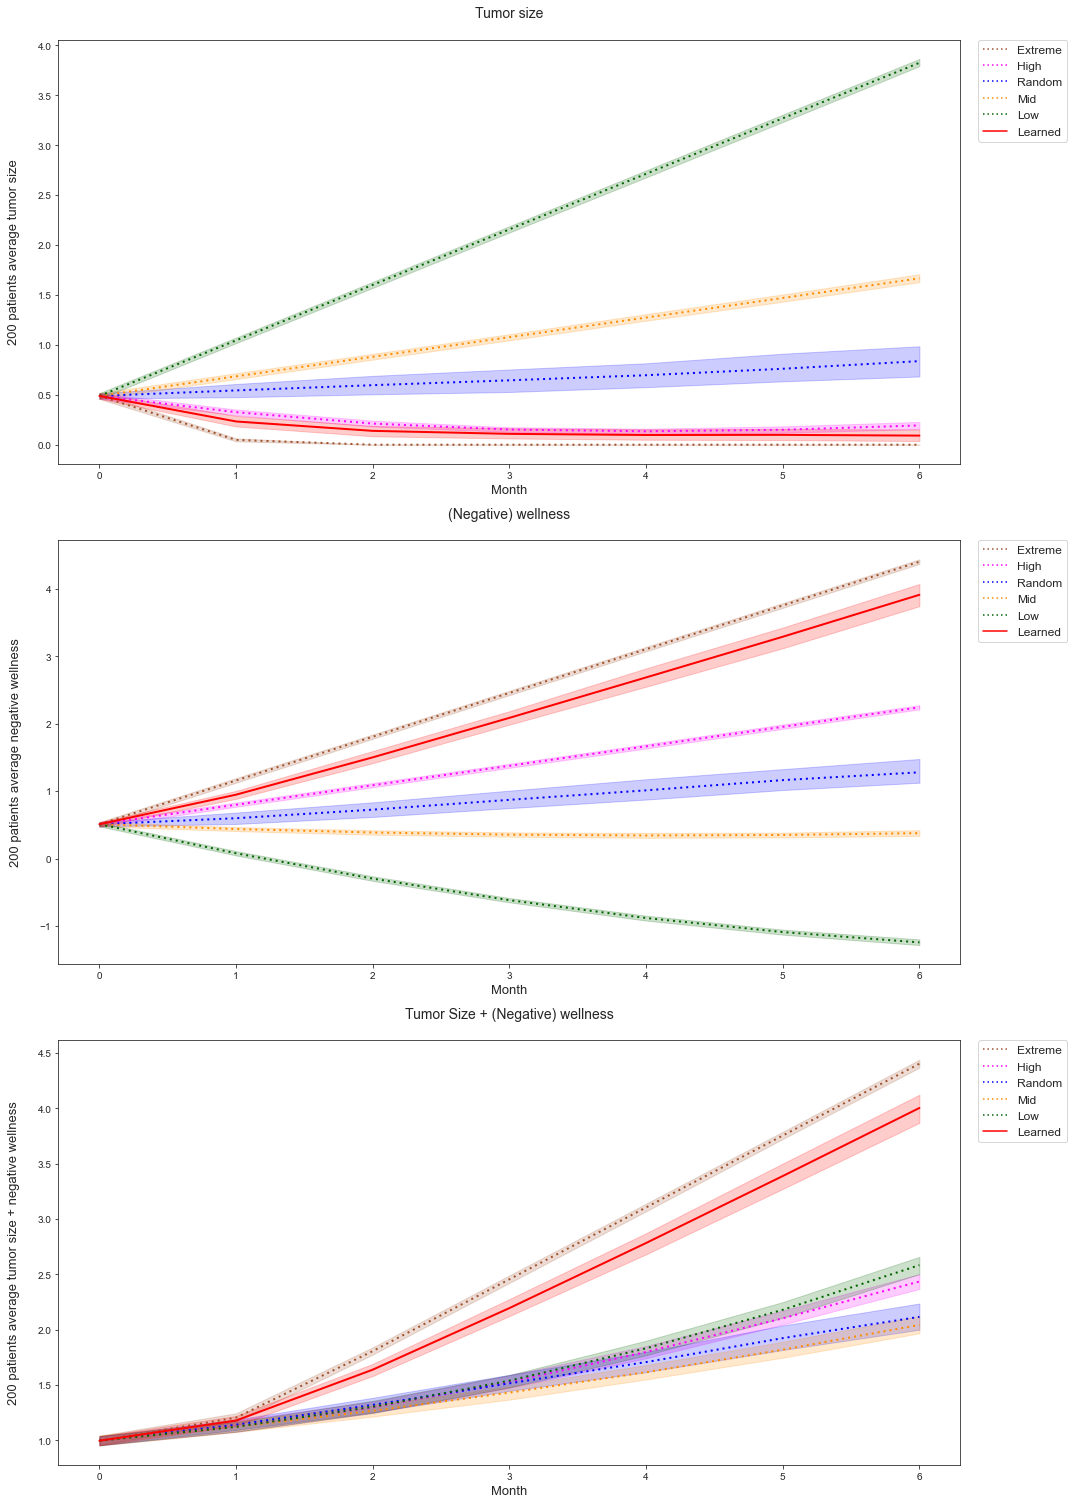


Policy Iteration: 2 - Evaluation results:
                         - Avg. ending tumor size : 0.09120044839555896
                         - Avg. max. toxicity : 4.810045203636865
                         - Avg. tumor size + toxicity (at the end of 6 months): 1.8517043075696493
                         - Avg. prob. of death : 0.7740419488968052



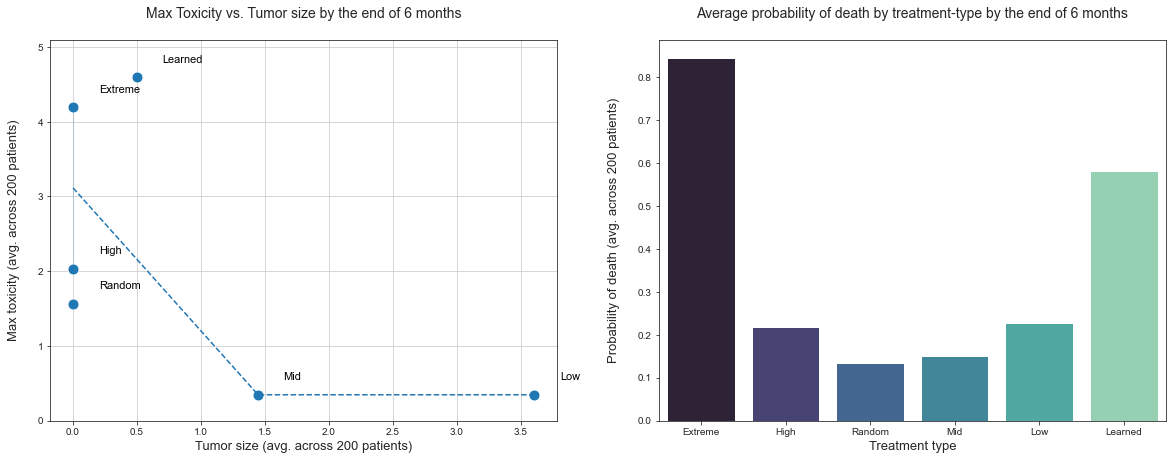

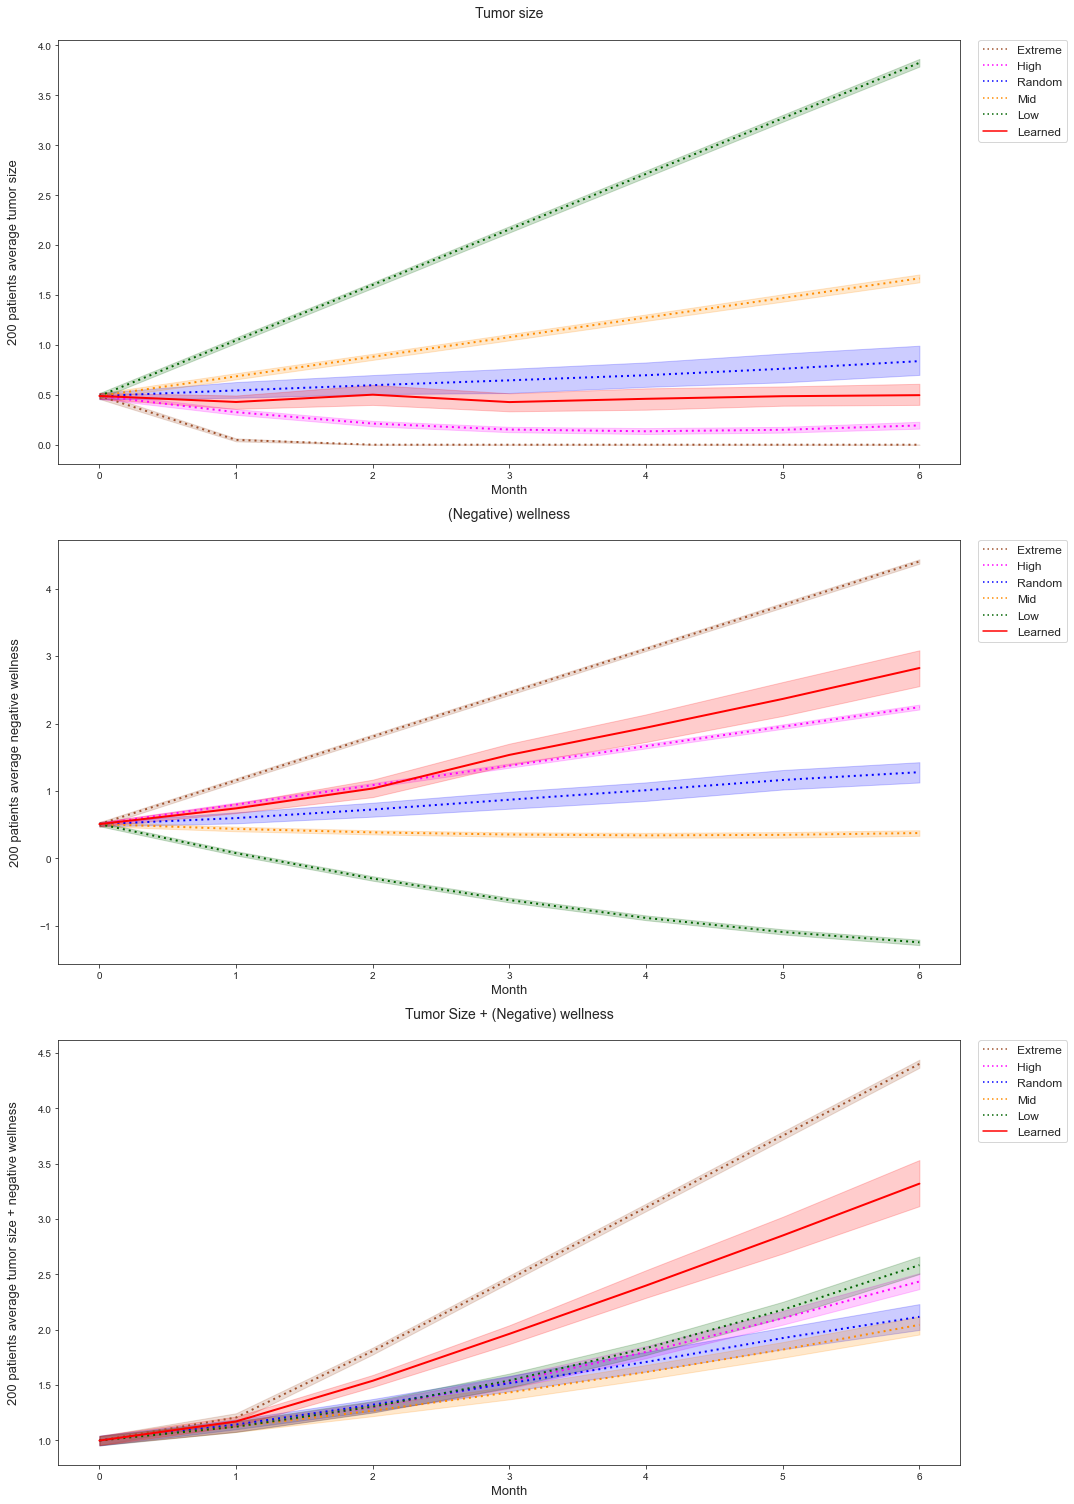


Policy Iteration: 3 - Evaluation results:
                         - Avg. ending tumor size : 0.4965181684835773
                         - Avg. max. toxicity : 4.59352147573266
                         - Avg. tumor size + toxicity (at the end of 6 months): 1.8053116888560703
                         - Avg. prob. of death : 0.5814245732162746



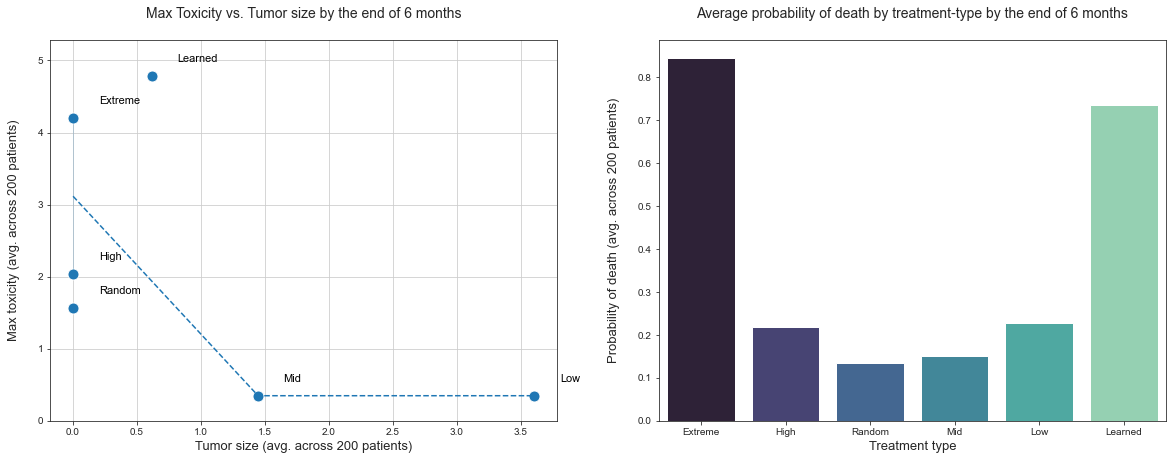

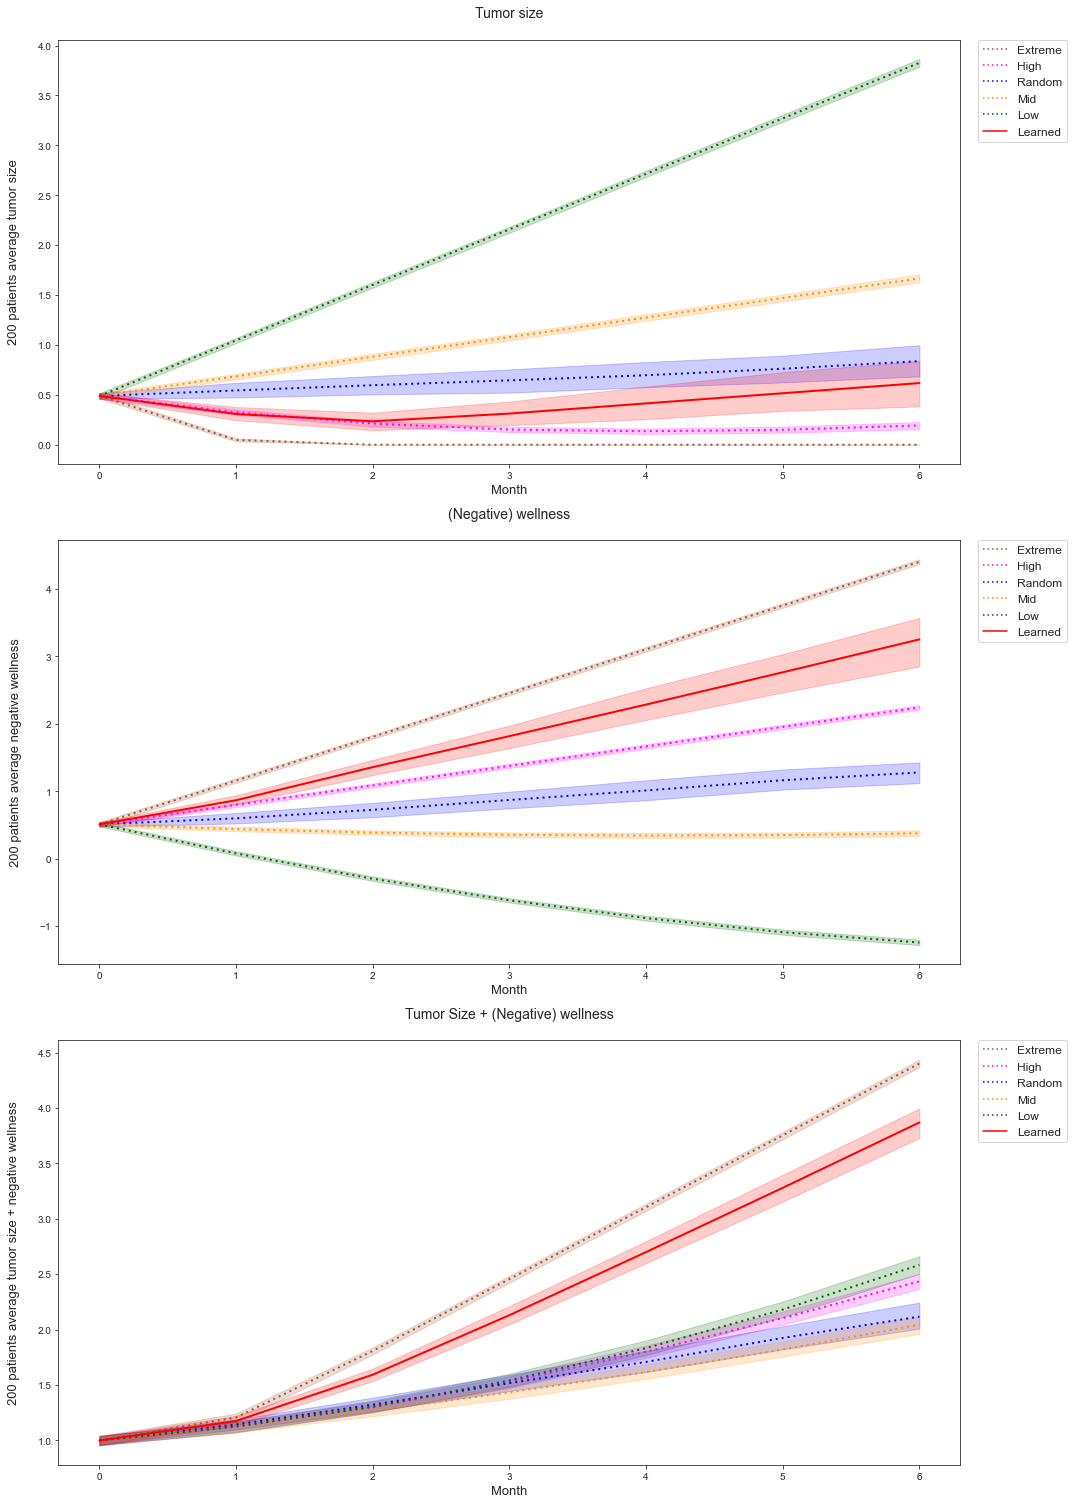


Policy Iteration: 4 - Evaluation results:
                         - Avg. ending tumor size : 0.6176056522415624
                         - Avg. max. toxicity : 4.783166844175596
                         - Avg. tumor size + toxicity (at the end of 6 months): 1.841120071952521
                         - Avg. prob. of death : 0.735305970408763

Averege death rate increased by 10%! Policy performance decreased! Run-1 terminated!

Evaluations: 100%|██████████| 1/1 [1:08:45<00:00, 4125.58s/it]


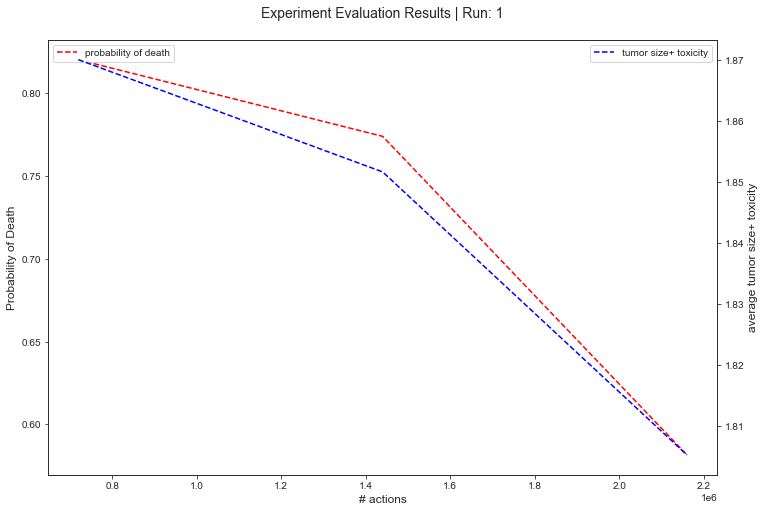

In [10]:
# Experiment execution
agg_results = []

eval_count = len(configs['S'])*len(configs['Actions'])*len(configs['Roll-outs'])*len(configs['Significance'])

pbar_evals = tqdm.tqdm(total=eval_count, desc="Evaluations")

for sample_size in configs['S']:
        
    for rollout_max in configs['Roll-outs']:

        for sig_lvl in configs['Significance']:

            run_results = evaluations_per_config(s_size                     = sample_size
                                                , init_state_group          = configs['init_state_group']

                                                , n_actions                 = configs['Actions'][0]
                                                , max_n_rollouts            = rollout_max
                                                , sig_lvl                   = sig_lvl

                                                , treatment_length_train    = 6
                                                , treatment_length_eval     = 6
                                                
                                                , max_policy_iter_per_run   = 10 # Maximum number of policy iterations per experiment
                                                , runs_per_config           = 1  # Number of experiments per one parameter config

                                                , eval_runs_per_state       = 1  # Episodes to generate from each init. state during evaluation phrase
                                                
                                                , off_policy_explr          = EXPLORE_LOGIC # What algorithm to use

                                                , rollout_tracking          = False # Show rollout info.
                                                , dataset_tracking          = False # Show train dataset

                                                , train_plot_tracking       = False # Show model training plot
                                                , eval_summary_tracking     = True  # Show a policy performance summary of evaluation runs
                                                , policy_behaviour_tracking = False # Show/store policy action selections vs. pendulum angle plot

                                                , show_experiment_run_eval_summary_plot = False # Show death-rate/tumor-size+toxicity vs. action no. plot of exp. run

                                                , use_toxi_n_tumor_for_pref = True # Generate preferences using sum(max-toxi, tumor-size) of rollouts
                                                , set_seed                  = 3
                                                , init_state_tag            = configs['init_state_tag']
                                                )

            agg_results.append(run_results)

            pbar_evals.update(1)
                
pbar_evals.close()

---
## TO-DO: Lengthier treatment regime - 12 months training data -> 12 months evaluation